# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

## Specifying filetype, and folder as before

In [35]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [36]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Std' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  approx_split  \
0               04 FG04-A1-4-start-50X-r1.txt           0.0    104.561540   
1               05 FG04-A1-4-start-50X-r2.txt           0.0    104.561540   
2               06 FG04-A1-4-start-50X-r3.txt           0.0    104.550541   
3              07 FG04-A1-4-start-100X-r1.txt           0.0    104.550541   
4              08 FG04-A1-4-start-100X-r2.txt           0.0    104.589035   
5  09 FG04-A1-4-start-100X-r3_CRR_DiadFit.txt           1.0    104.605533   
6                 36 FG04-A1-4-end-50X-r4.txt           0.0    104.567039   
7     37 FG04-A1-4-end-50X-r5_CRR_DiadFit.txt           1.0    104.528544   
8     38 FG04-A1-4-end-50X-r6_CRR_DiadFit.txt           1.0    104.589035   
9                40 FG04-A1-4-end-100X-r5.txt           0.0    104.605533   

     Diad1_pos    Diad2_pos      HB1_pos      HB2_pos      C13_pos  \
0  1282.921128  1387.482667  1262.662123  1408.753522  1369.852274   
1  1282.915629  1387.477168  1262.453154  1408.863506  1369.874271   
2  1282.899131  1387.449672  1262.827099  1409.127467  1369.896268   
3  1282.921128  1387.471669          NaN  1409.281444          NaN   
4  1282.888133  1387.477168          NaN  1408.775519          NaN   
5  1282.866136  1387.471669          NaN  1409.226452          NaN   
6  1282.904630  1387.471669  1262.535642  1409.149464          NaN   
7  1282.921128  1387.449672          NaN  1409.138465          NaN   
8  1282.855137  1387.444173  1262.288178  1409.187958  1369.747790   
9  1282.827642  1387.433175          NaN  1409.143964          NaN   

   Diad1_abs_prom  Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  \
0      963.995041     1973.288964  ...  773.220021  734.196122   1649.095047   
1      991.570121     2046.100585  ...  768.817705  735.657232   1675.870109   
2     1534.766335     3150.695529  ...  829.123972  767.416062   2224.966347   
3      666.835803     1356.559028  ...  724.687515         NaN   1334.835803   
4      644.760010     1293.752922  ...  722.620726         NaN   1312.460022   
5      650.444825     1309.076699  ...  722.313081         NaN   1318.144837   
6      686.574600     1462.183951  ...  775.422900         NaN   1396.874588   
7      482.151855      979.597934  ...  757.411217         NaN   1193.851867   
8      930.872793     1892.859538  ...  764.617653  727.722755   1614.772787   
9      430.144204      859.881792  ...  703.625657         NaN   1096.544198   

   HB1_height  Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0  731.725754        685.100006        683.900009                2.444634   
1  733.087021        684.299988        683.399994                2.258503   
2  762.012423        690.200012        688.600006                2.484527   
3         NaN        668.000000        667.350006                     NaN   
4         NaN        667.700012        667.600006                     NaN   
5         NaN        667.700012        667.449997                     NaN   
6  748.168932        710.299988        708.249985                     NaN   
7         NaN        711.700012        710.200012                     NaN   
8  732.473124        683.899994        682.550003                2.710218   
9         NaN        666.399994        666.050003                     NaN   

   Diad2_HB2_Valley_prom  HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0               1.023977                  30.386495                  57.209473  
1               1.025461                  27.037145                  46.369957  
2               1.033497                  45.508920                  87.166292  
3               1.011983                        NaN                  41.723057  
4               1.019355                        NaN                  46.808842  
5               1.014688                        NaN                  39.046192  
6               1.017212                  16.266347                  29.221092  
7               1.007291                 

### Now load one file from this group to tweak parameters for

In [37]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

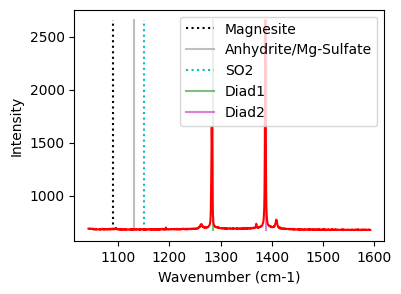

In [38]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [39]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [40]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=963.9950405616651, HB_prom=49.72575356221864, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1282.923322       1282.923372         0.00254       2741.974491   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma     HB1_Cent    HB1_Area  HB1_Sigma  \
0           1.006823                  0  1262.664403  386.060161   3.013689   

   Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  \
0             972.939288        3.003673        0.744939    2.013645   

         Diad1_refit  Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0  Flagged Warnings:      1.011765           1.0                    0.02369   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0               0.00207  PseudoVoigtModel

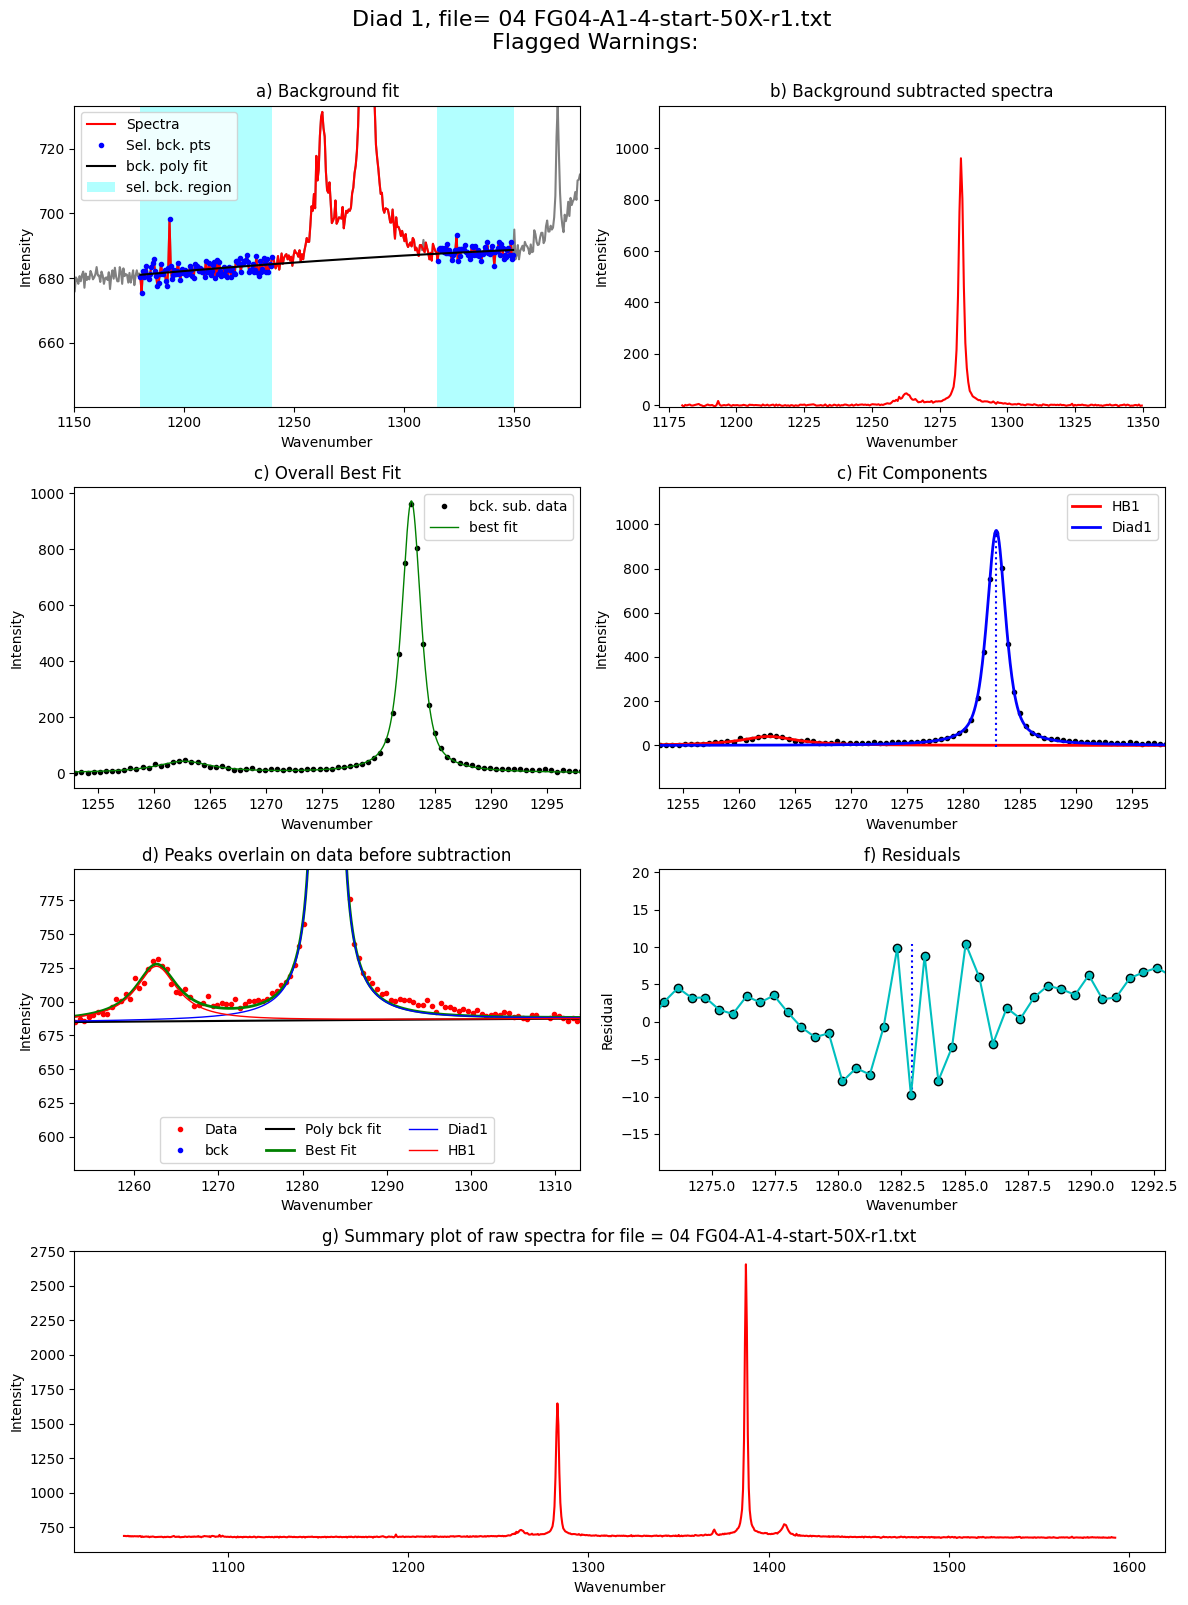

In [41]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [42]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [43]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=True, gauss_amp=187.24002910066838, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1973.2889642101993, HB_prom=93.62001455033419, C13_prom=38.296127670847, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1387.482422       1387.482372        0.001156       4557.621044   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.834242                  0  1409.003487  467.123177   1.881001   

      C13_Cent  ...  Diad2_fwhm  Diad2_Gauss_Cent  Diad2_Gauss_Area  \
0  1369.735575  ...    1.668484       1388.361725        493.761718   

   Diad2_Gauss_Sigma        Diad2_refit  Diad2_Asym50  Diad2_Asym70  \
0          16.432539  Flagged Warnings:      1.002004      1.015827   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0                   0.003344              0.000842  PseudoVoigtModel  

[1 rows x 25 columns]

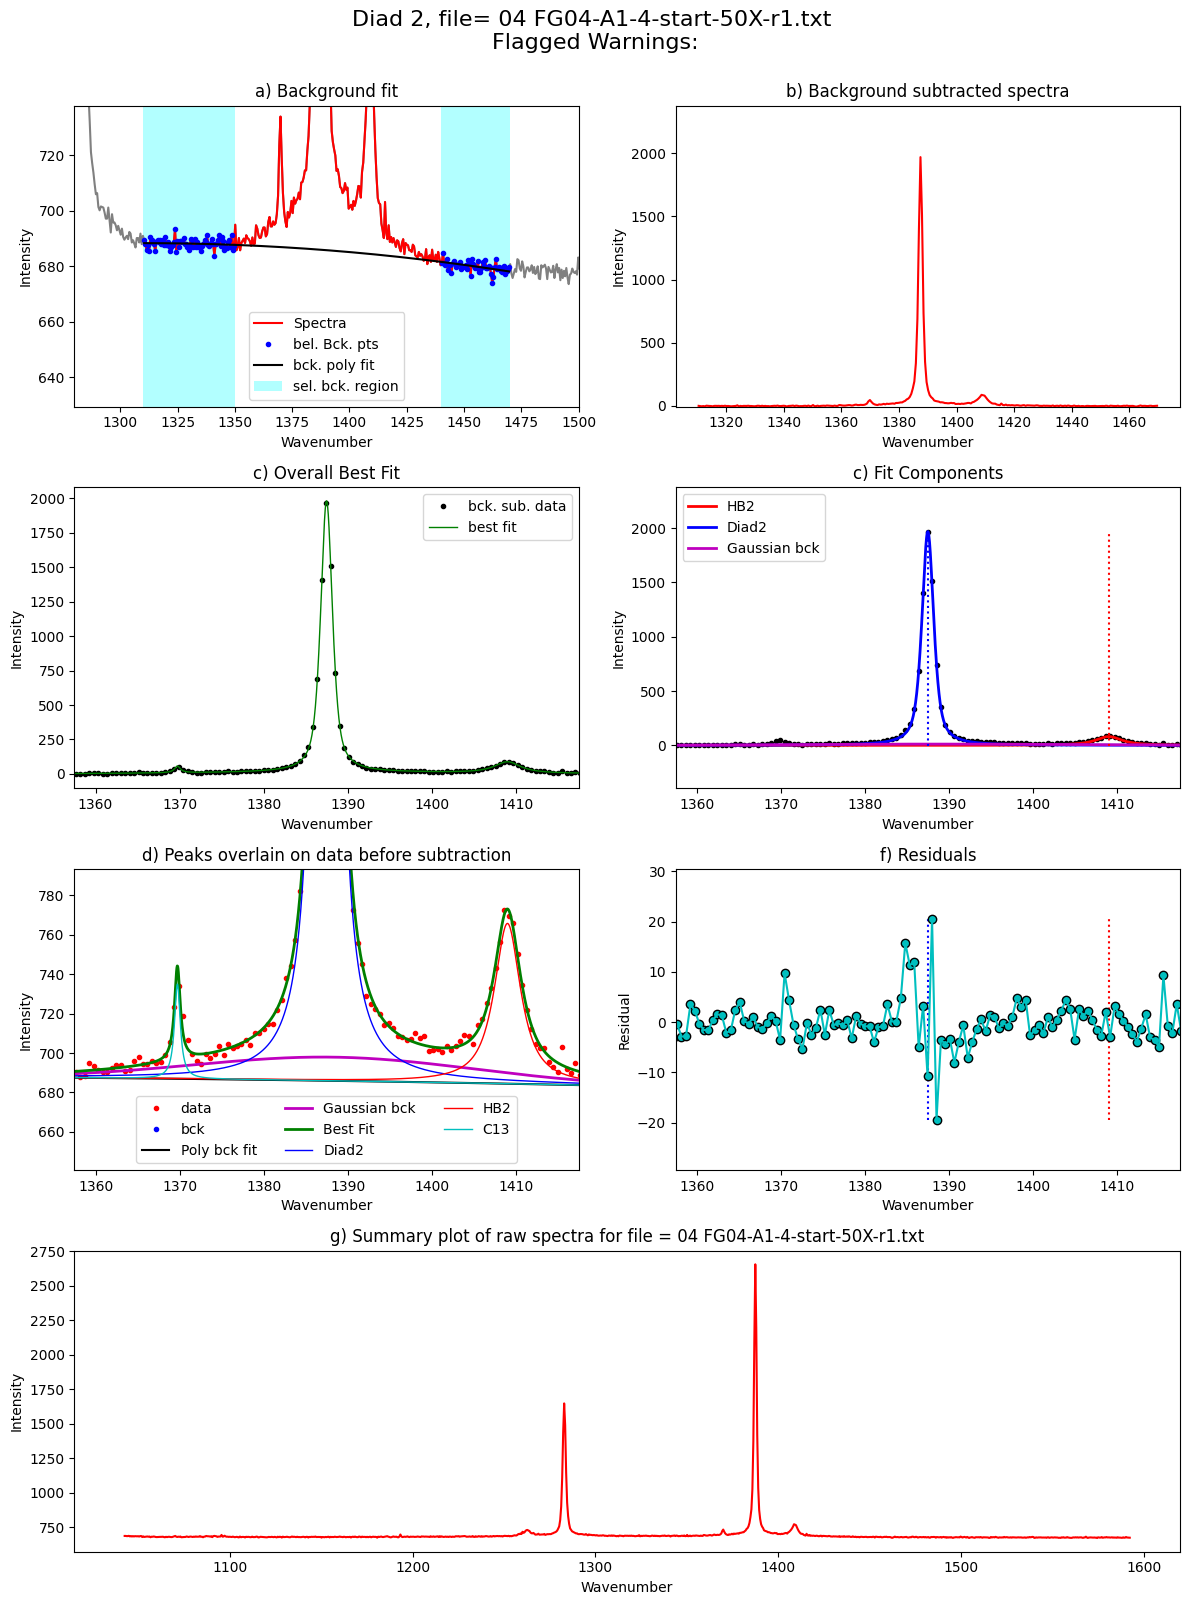

In [44]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/10 [00:00<?, ?it/s]

Processing file: 04 FG04-A1-4-start-50X-r1.txt


 10%|█         | 1/10 [00:07<01:07,  7.49s/it]

Processing file: 05 FG04-A1-4-start-50X-r2.txt


 20%|██        | 2/10 [00:11<00:43,  5.44s/it]

Processing file: 06 FG04-A1-4-start-50X-r3.txt


 30%|███       | 3/10 [00:16<00:38,  5.44s/it]

Processing file: 07 FG04-A1-4-start-100X-r1.txt


 40%|████      | 4/10 [00:20<00:27,  4.53s/it]

Processing file: 08 FG04-A1-4-start-100X-r2.txt


 50%|█████     | 5/10 [00:22<00:19,  3.93s/it]

Processing file: 09 FG04-A1-4-start-100X-r3_CRR_DiadFit.txt


 60%|██████    | 6/10 [00:26<00:15,  3.75s/it]

Processing file: 36 FG04-A1-4-end-50X-r4.txt


 70%|███████   | 7/10 [00:29<00:10,  3.56s/it]

Processing file: 37 FG04-A1-4-end-50X-r5_CRR_DiadFit.txt


 80%|████████  | 8/10 [00:32<00:06,  3.42s/it]

Processing file: 38 FG04-A1-4-end-50X-r6_CRR_DiadFit.txt


 90%|█████████ | 9/10 [00:38<00:04,  4.15s/it]

Processing file: 40 FG04-A1-4-end-100X-r5.txt


100%|██████████| 10/10 [00:41<00:00,  4.13s/it]


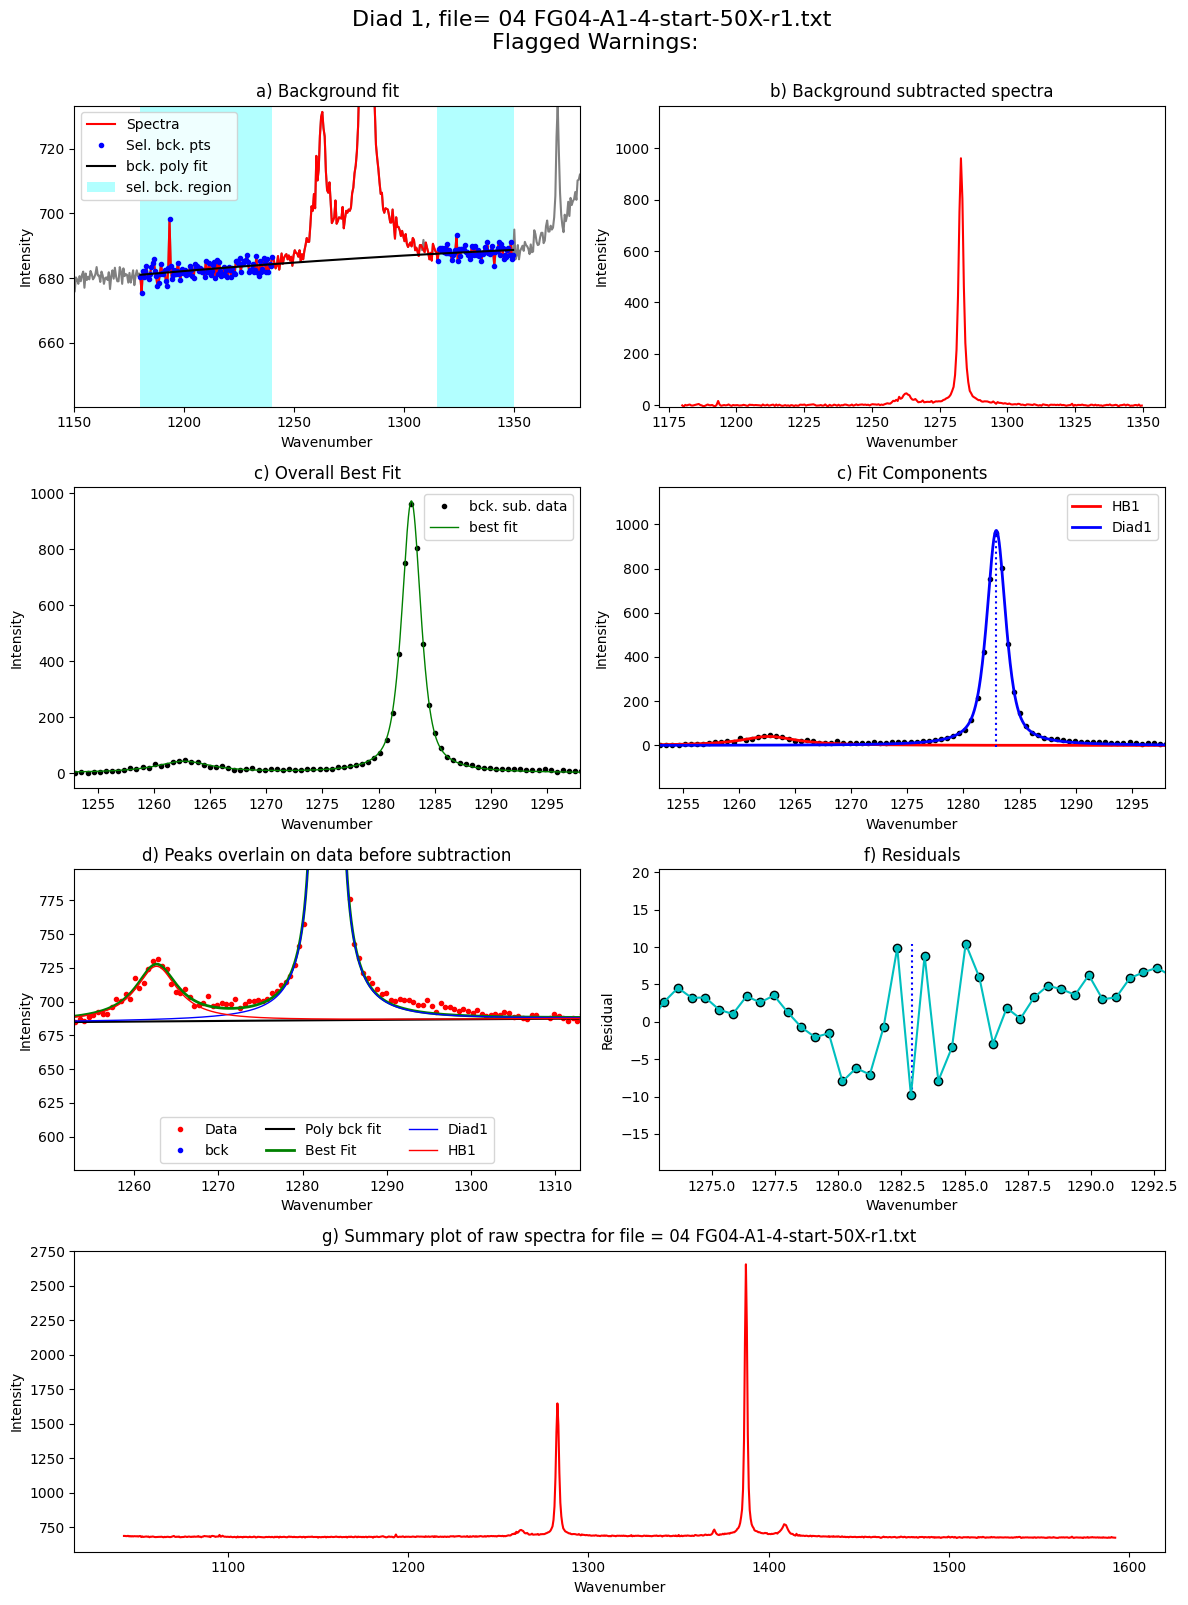

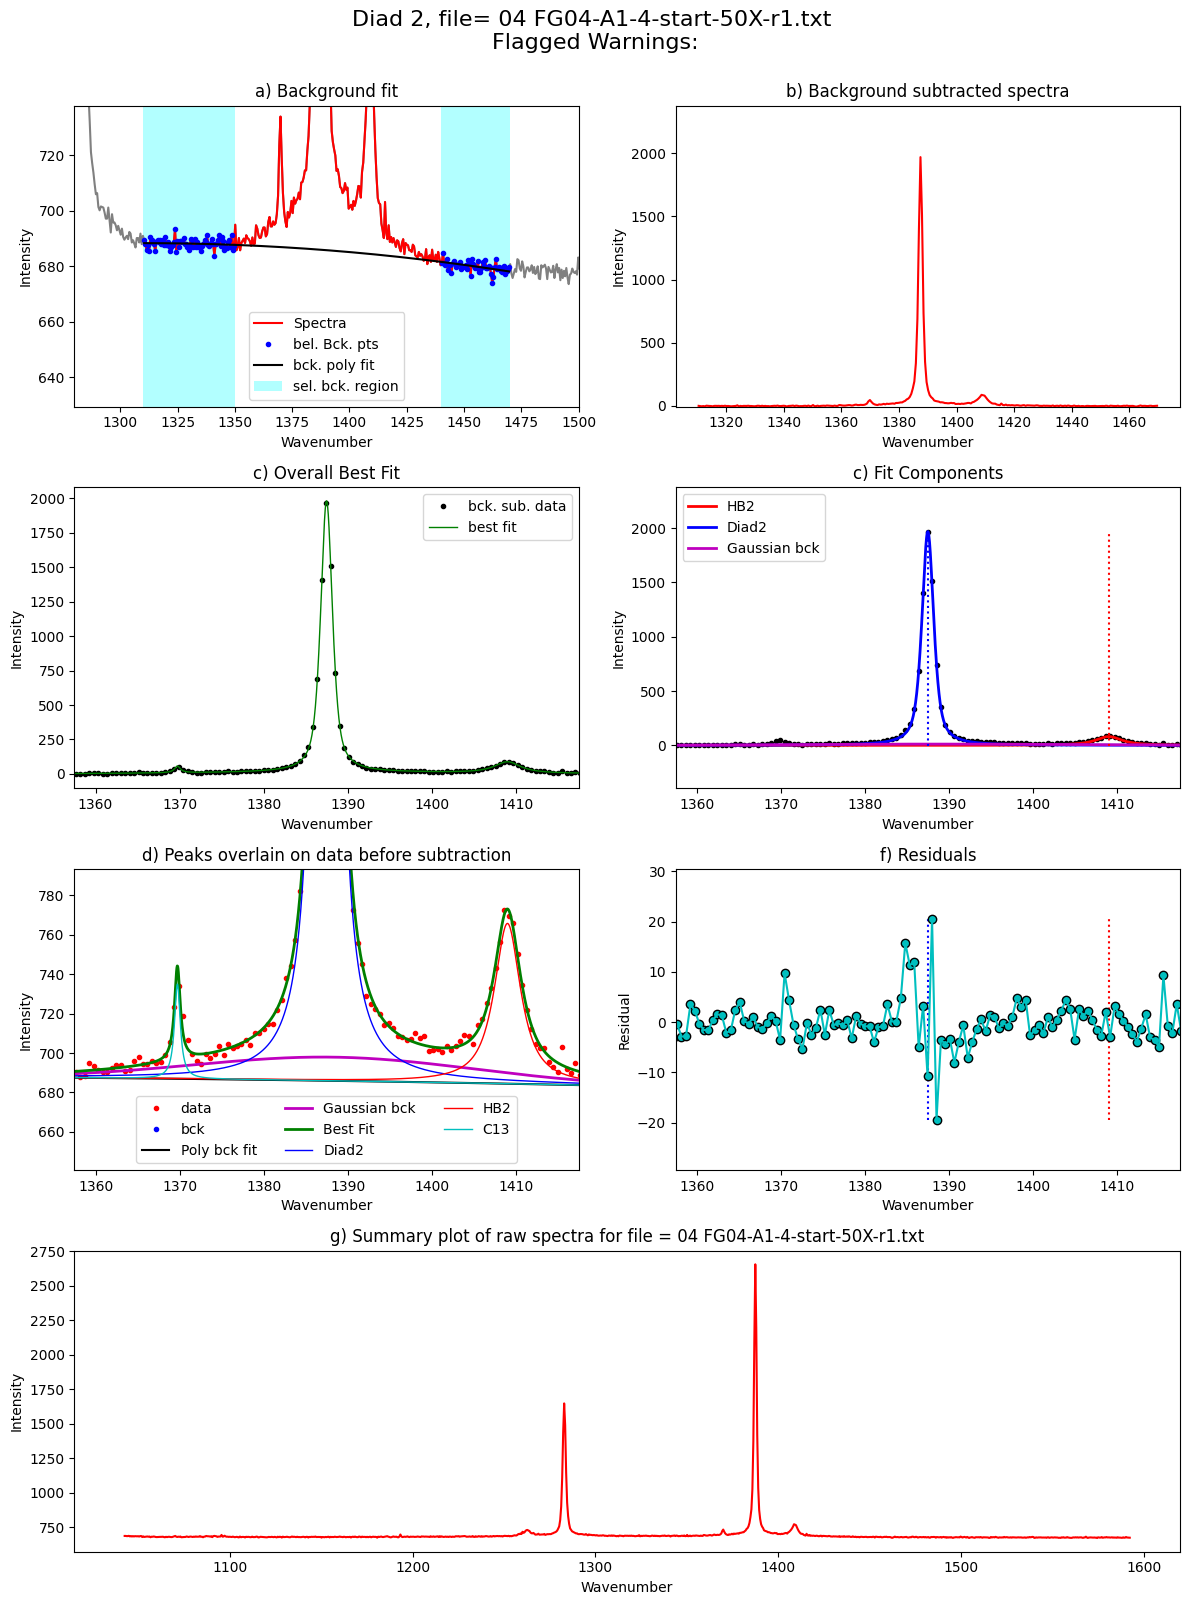

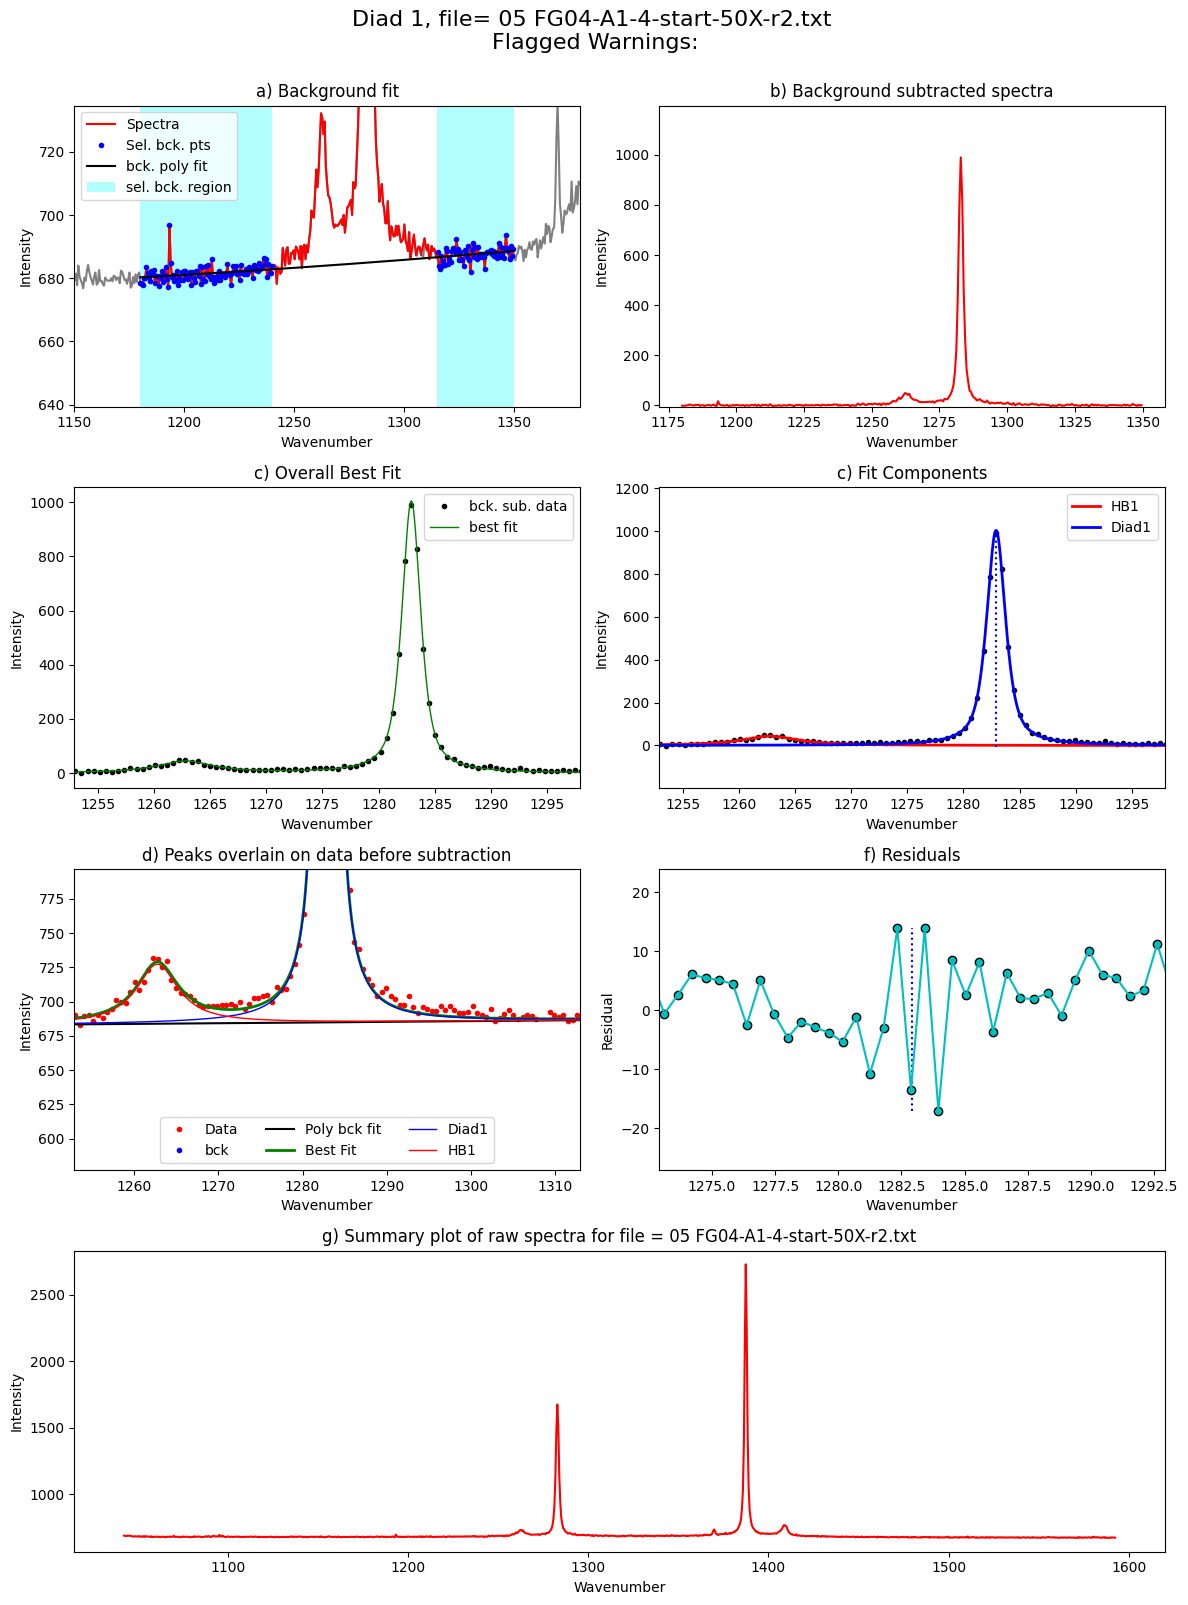

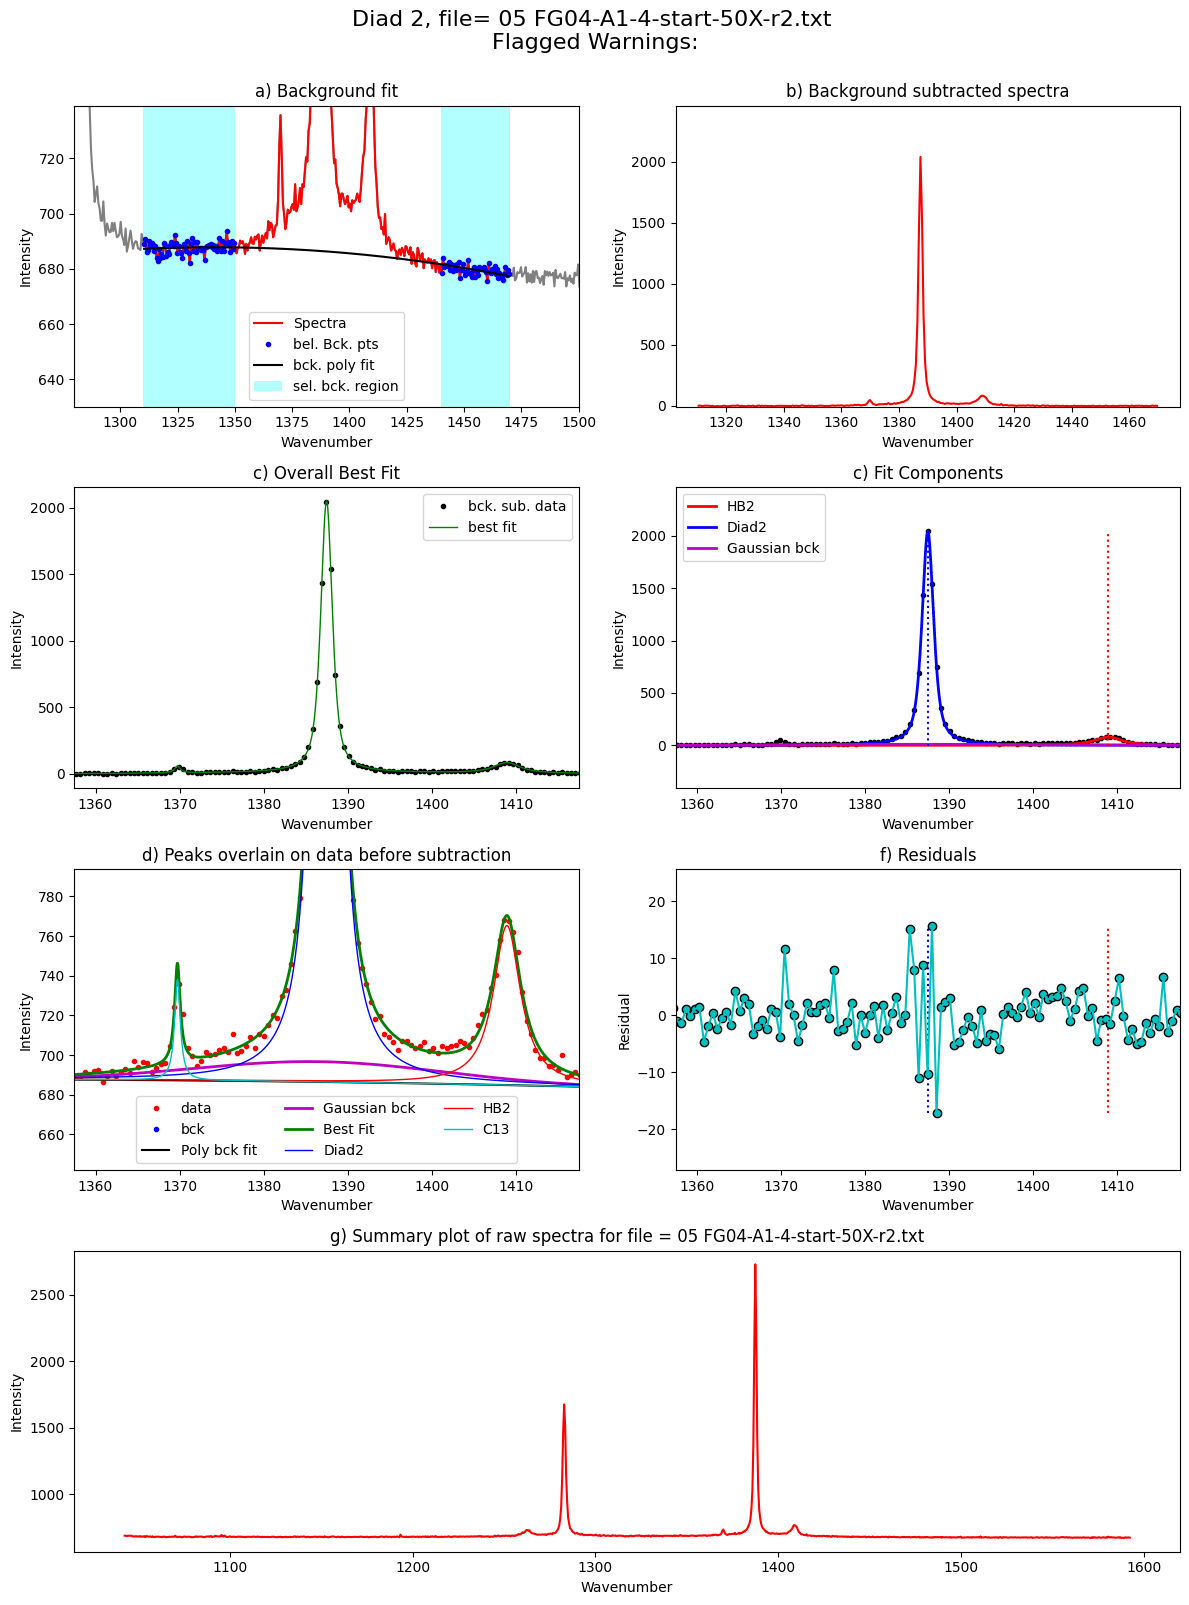

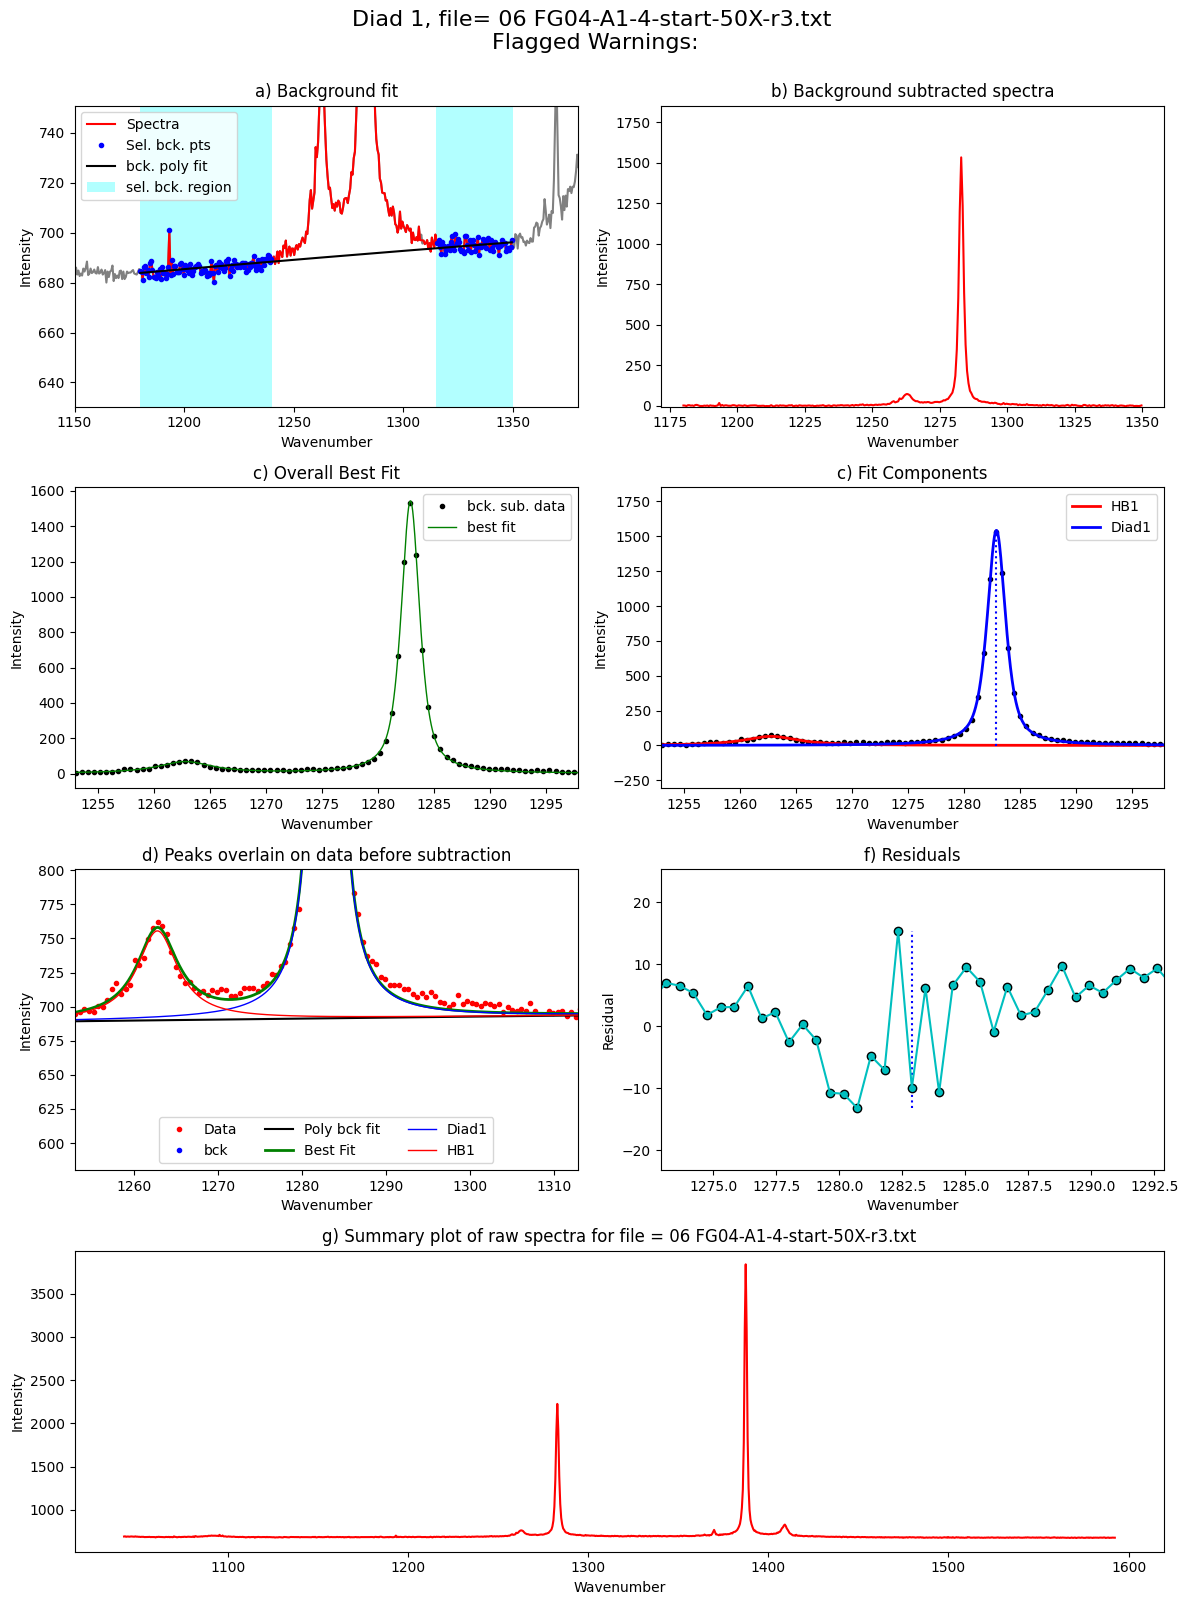

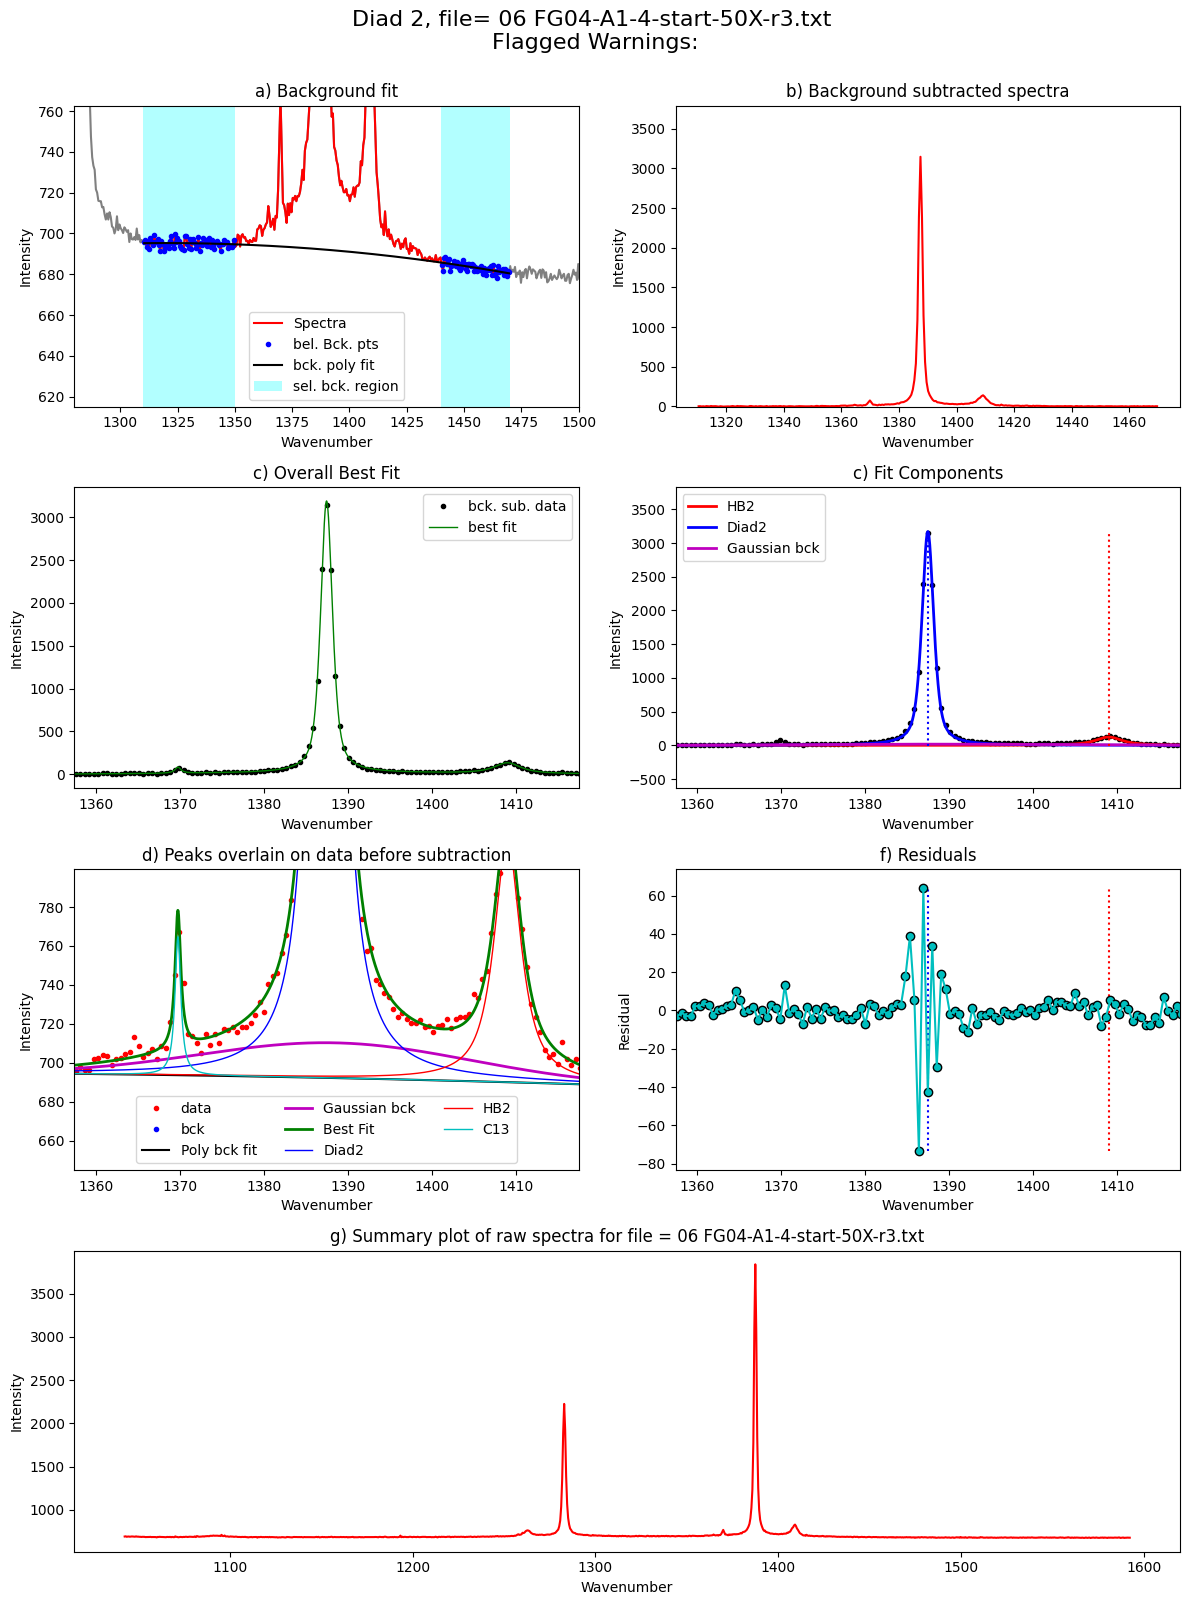

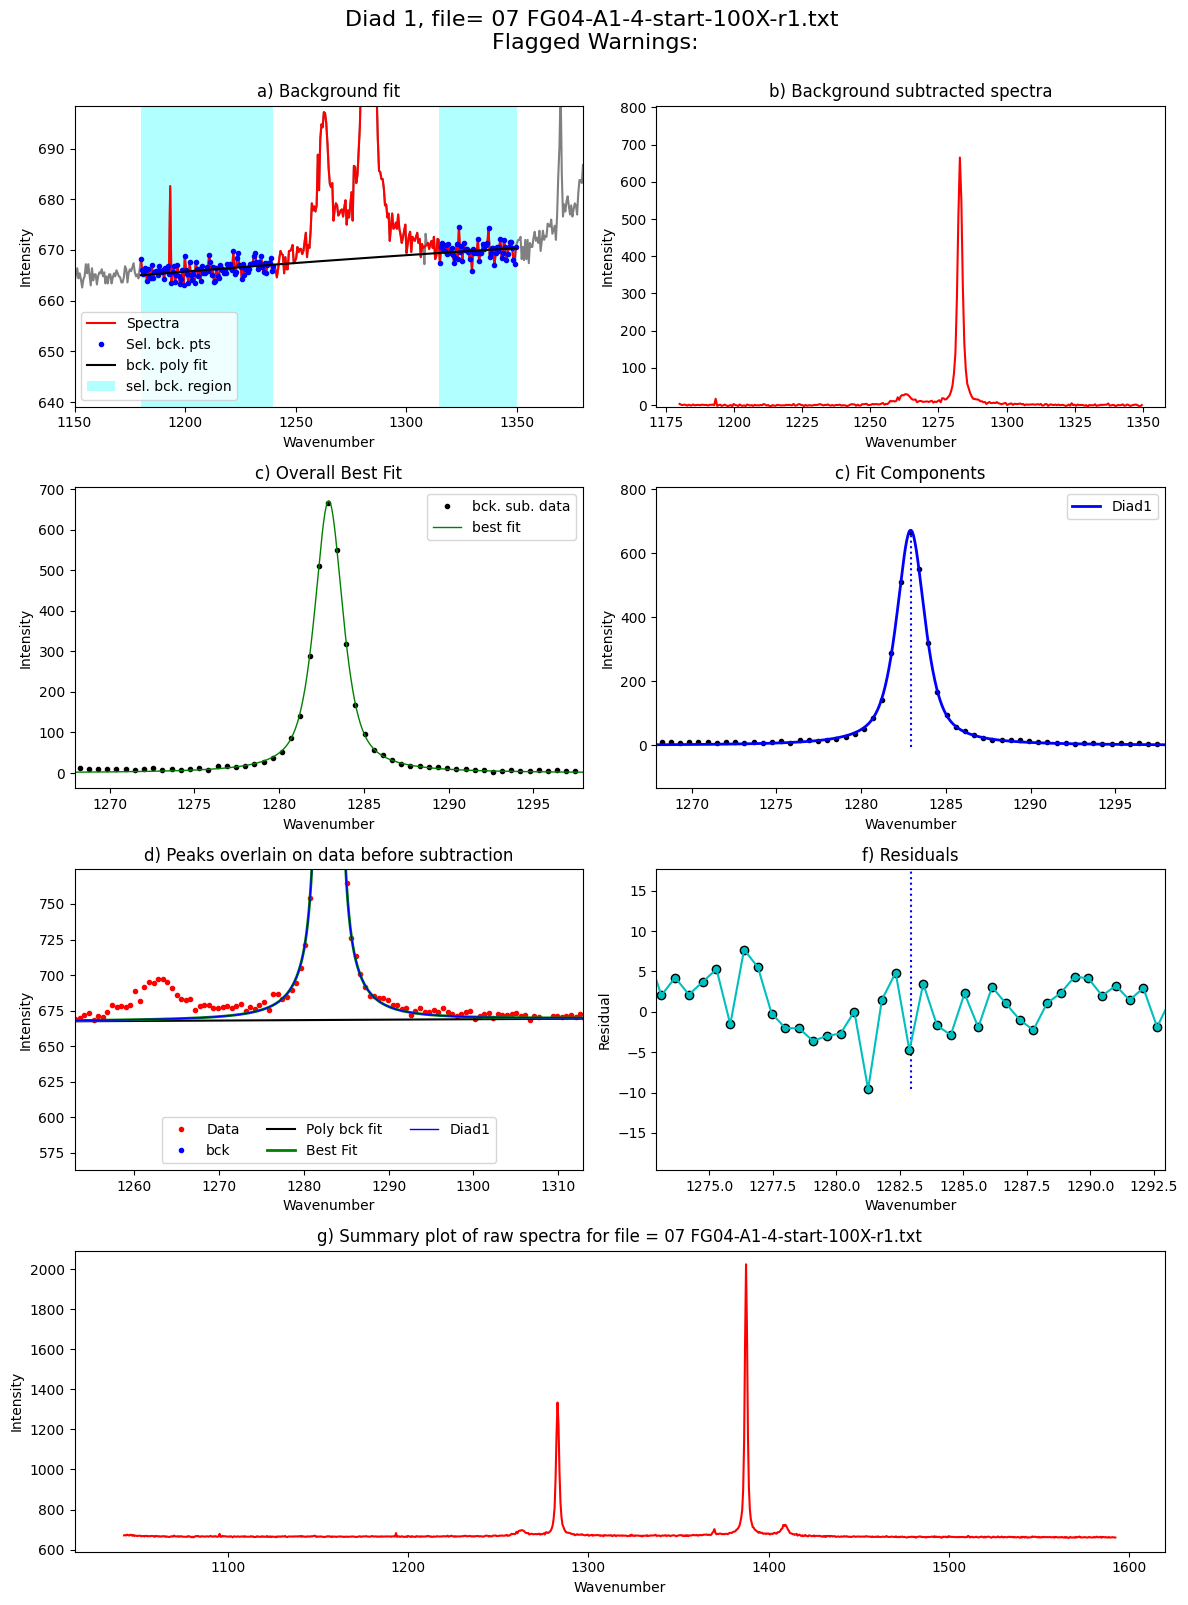

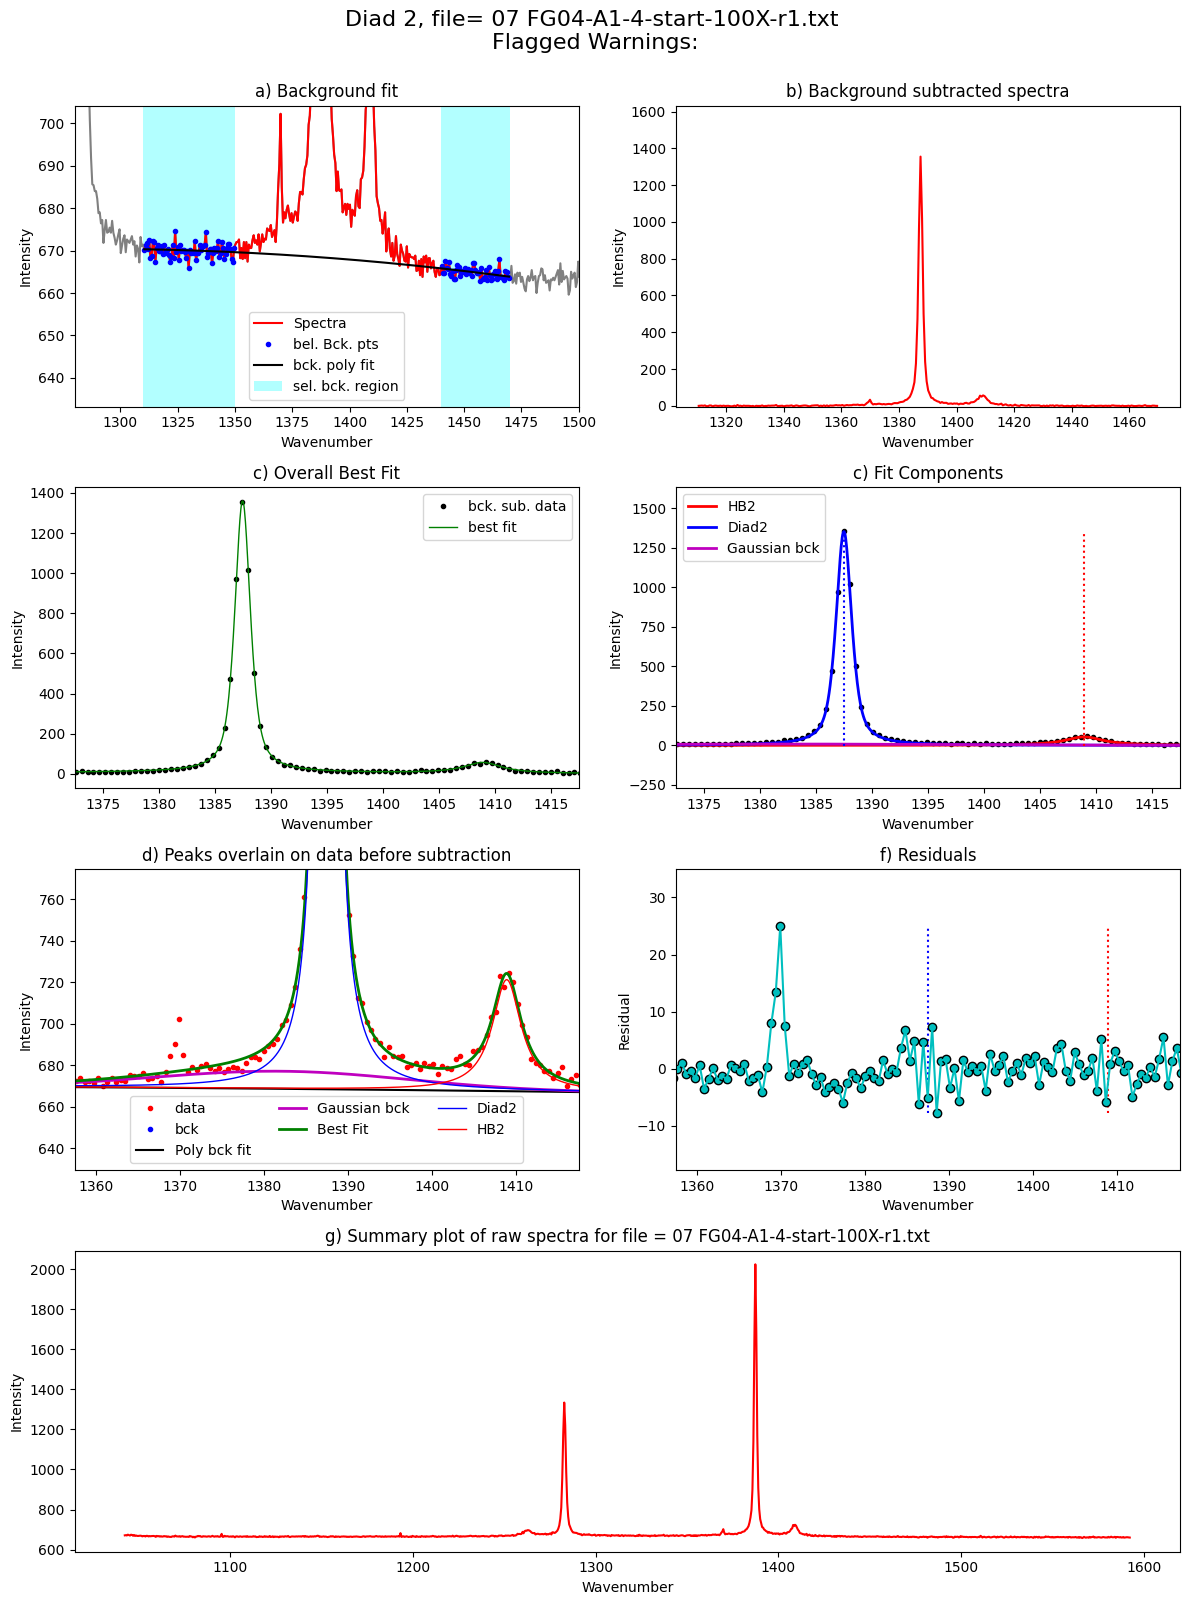

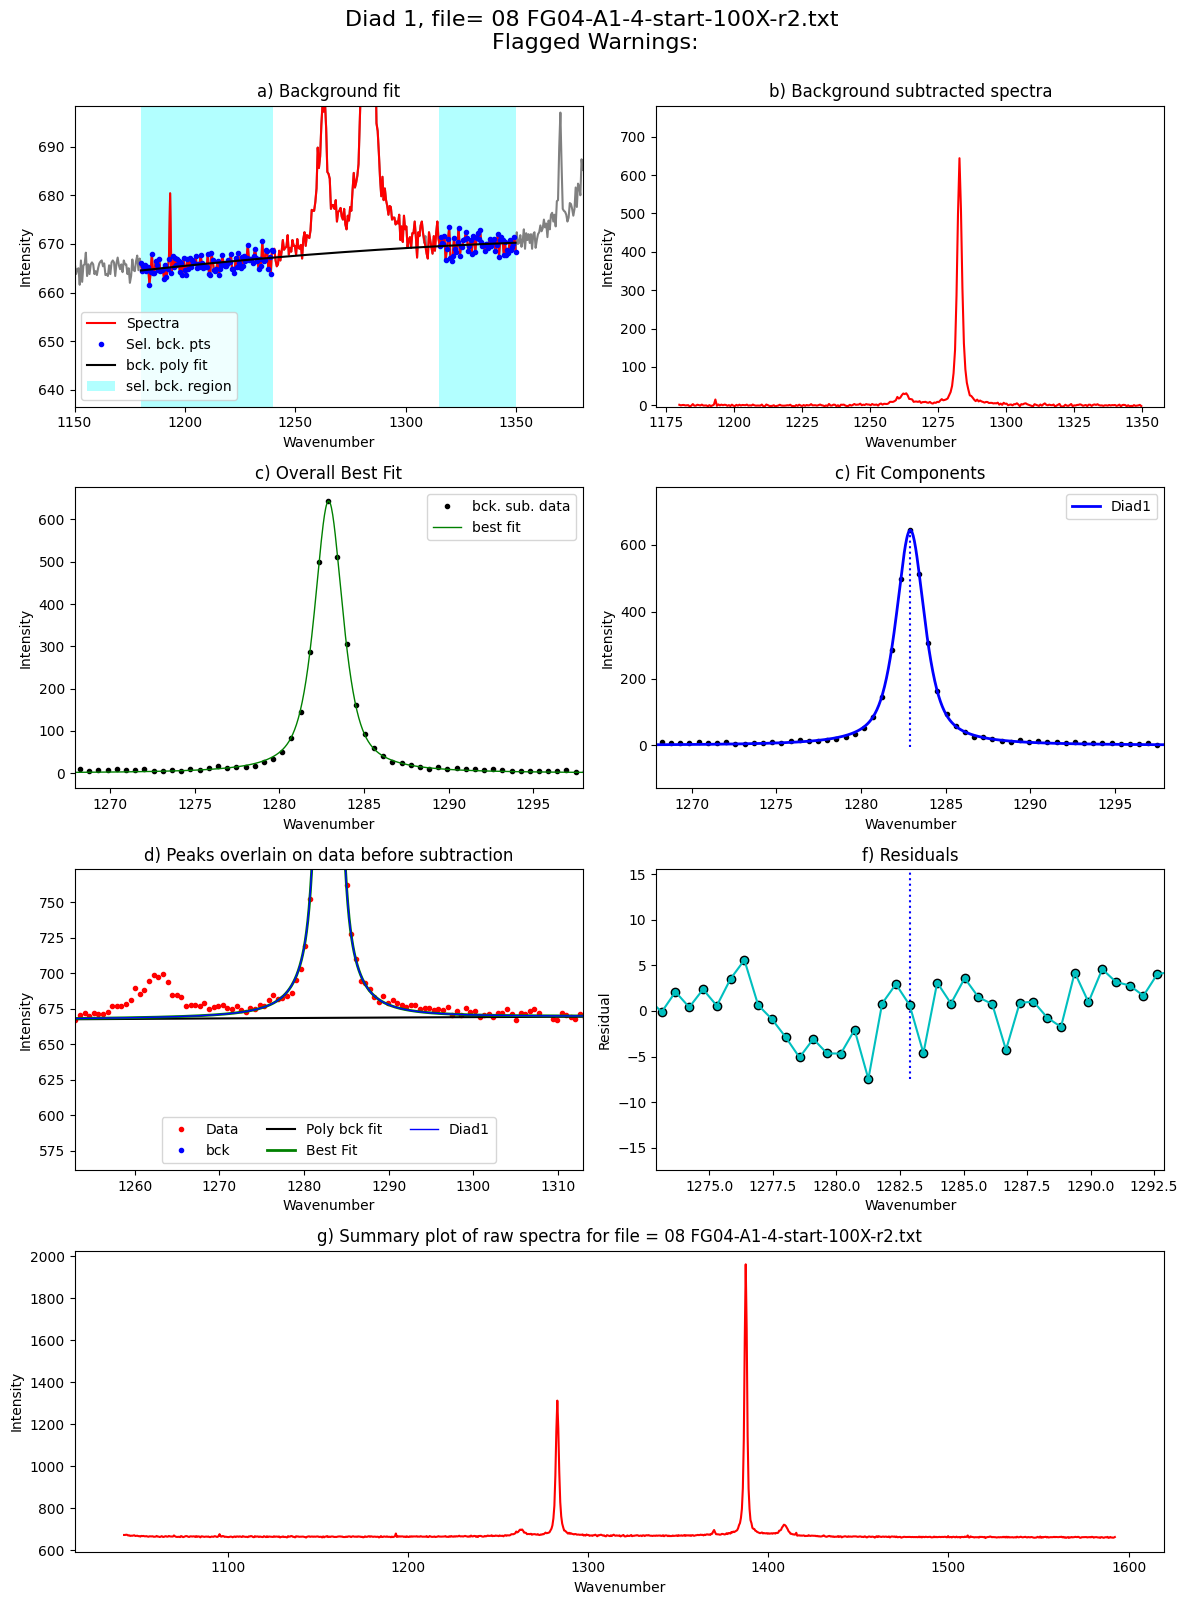

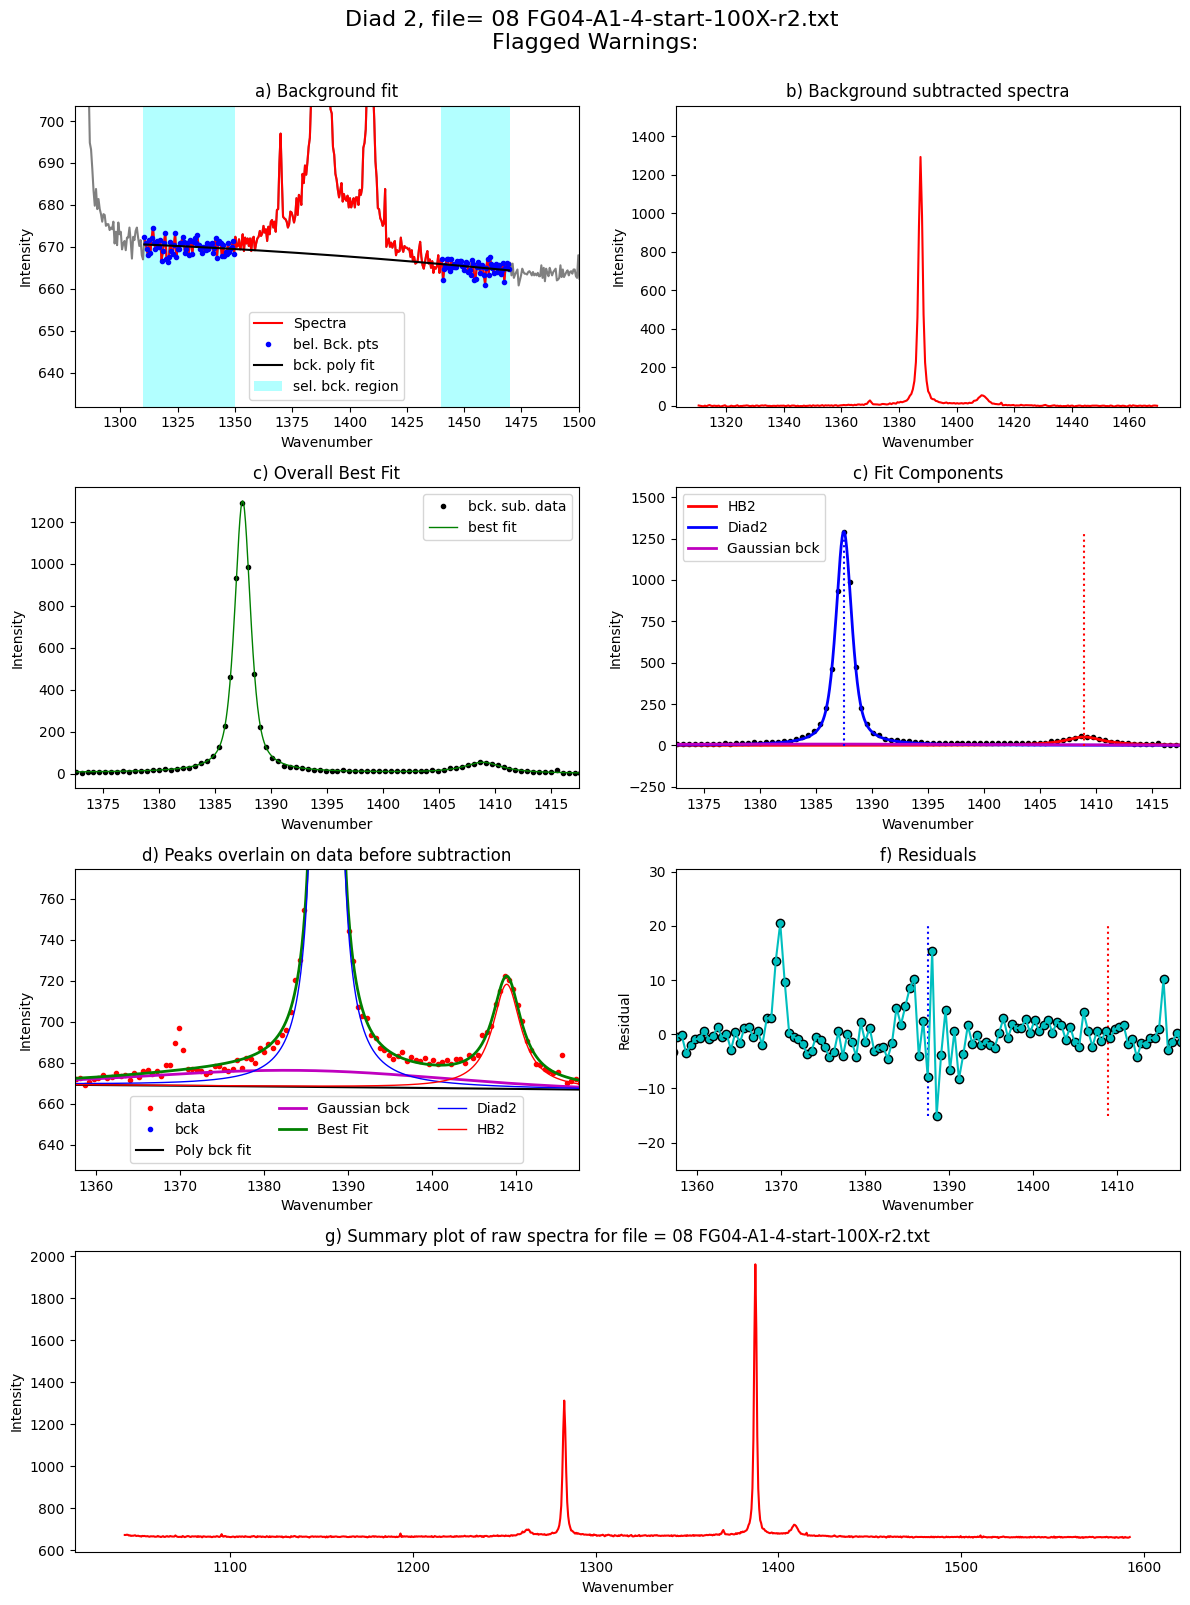

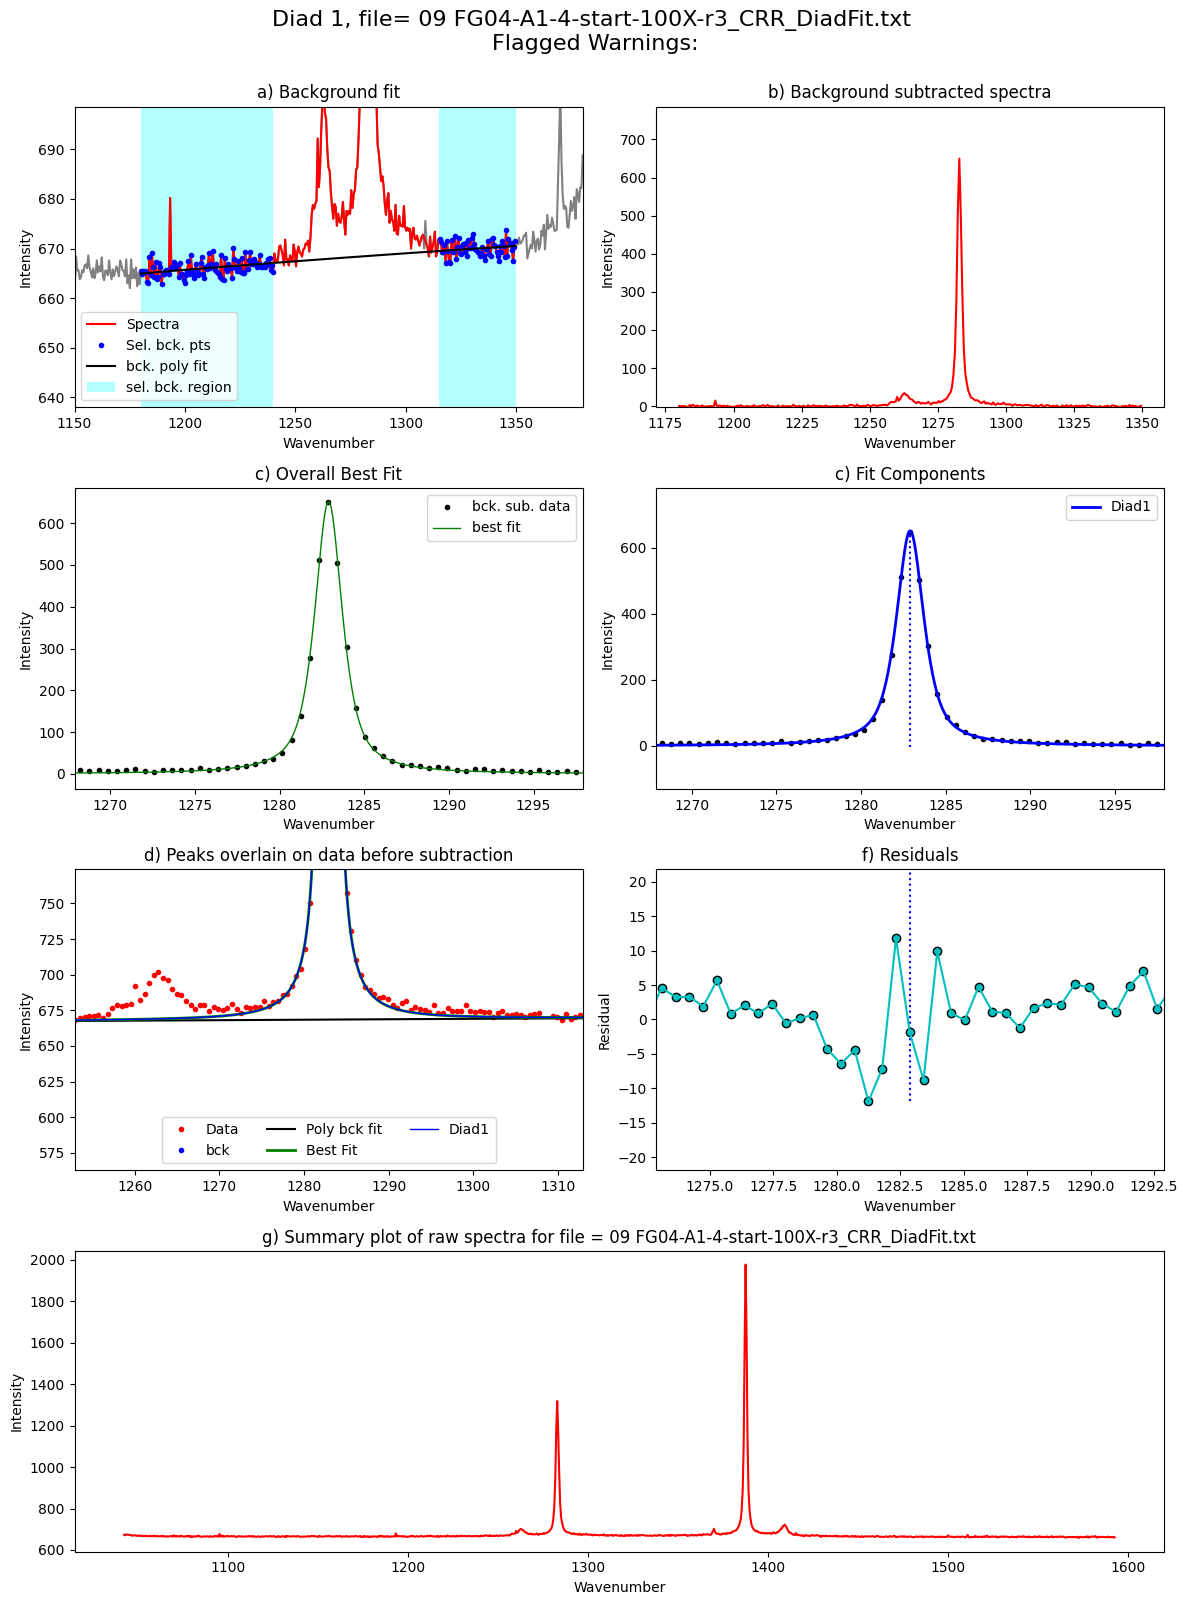

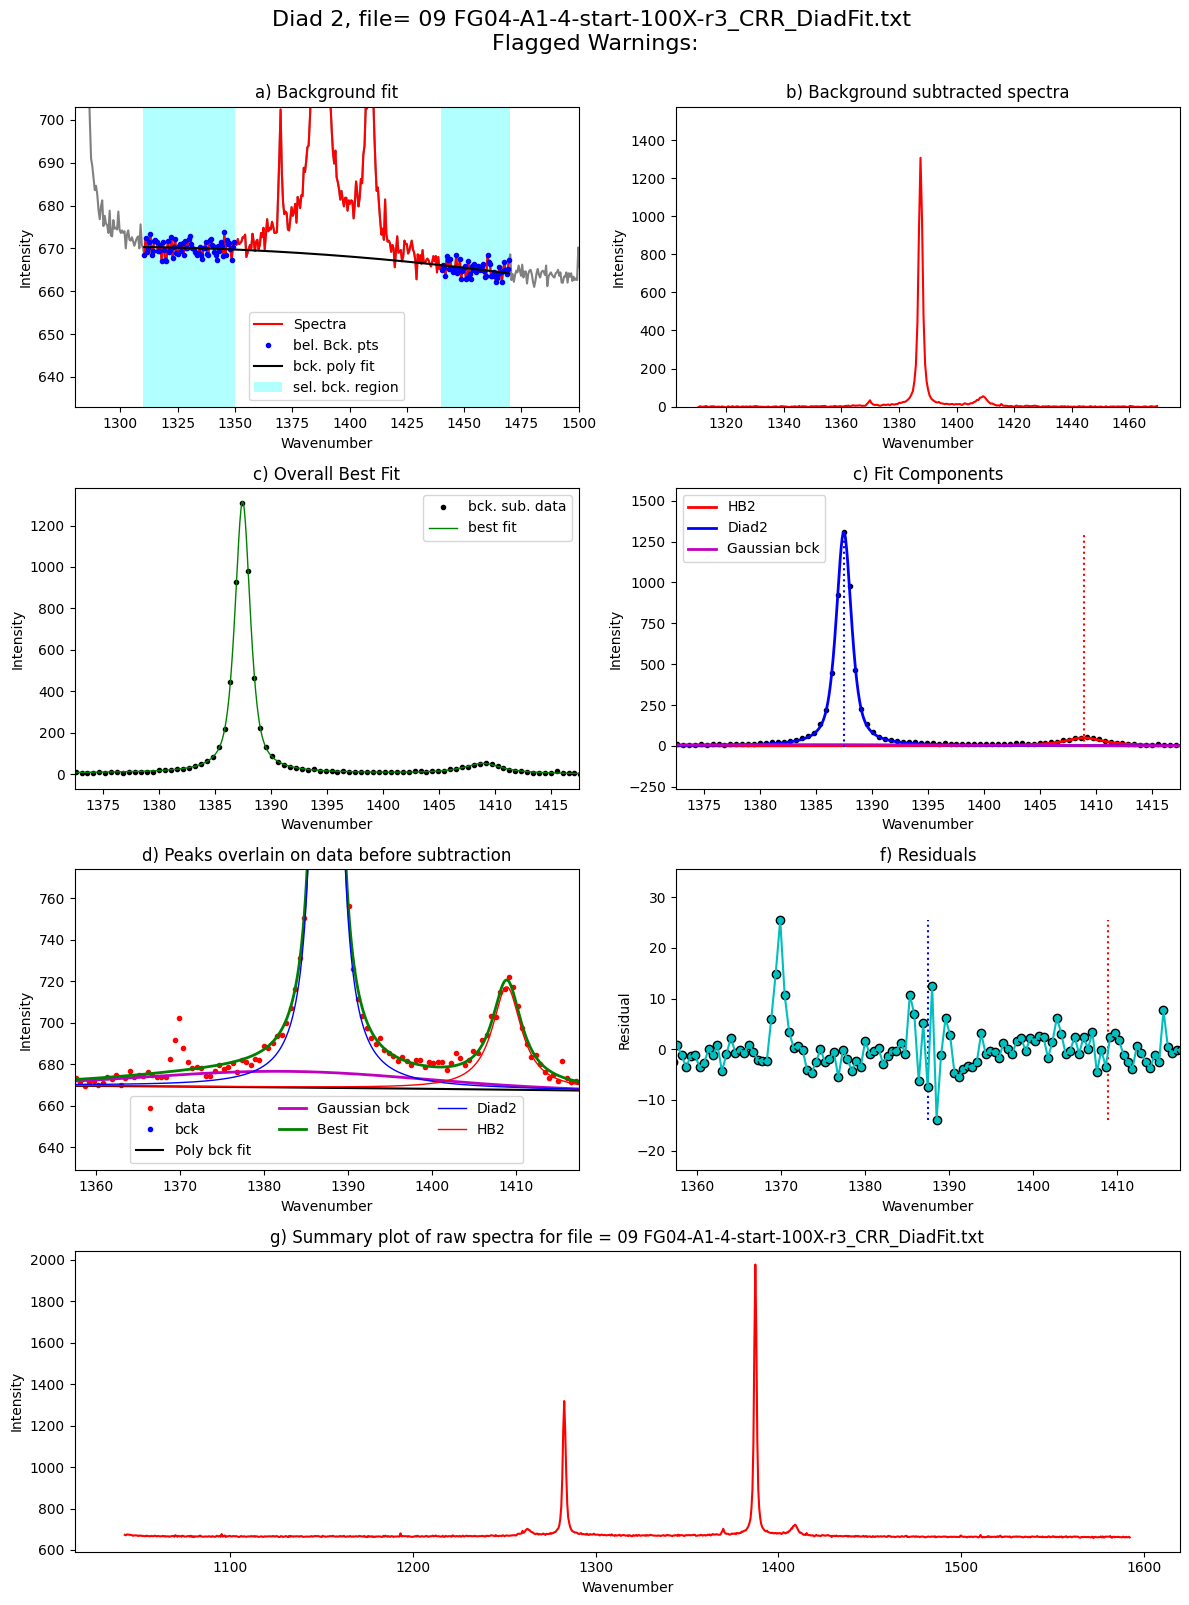

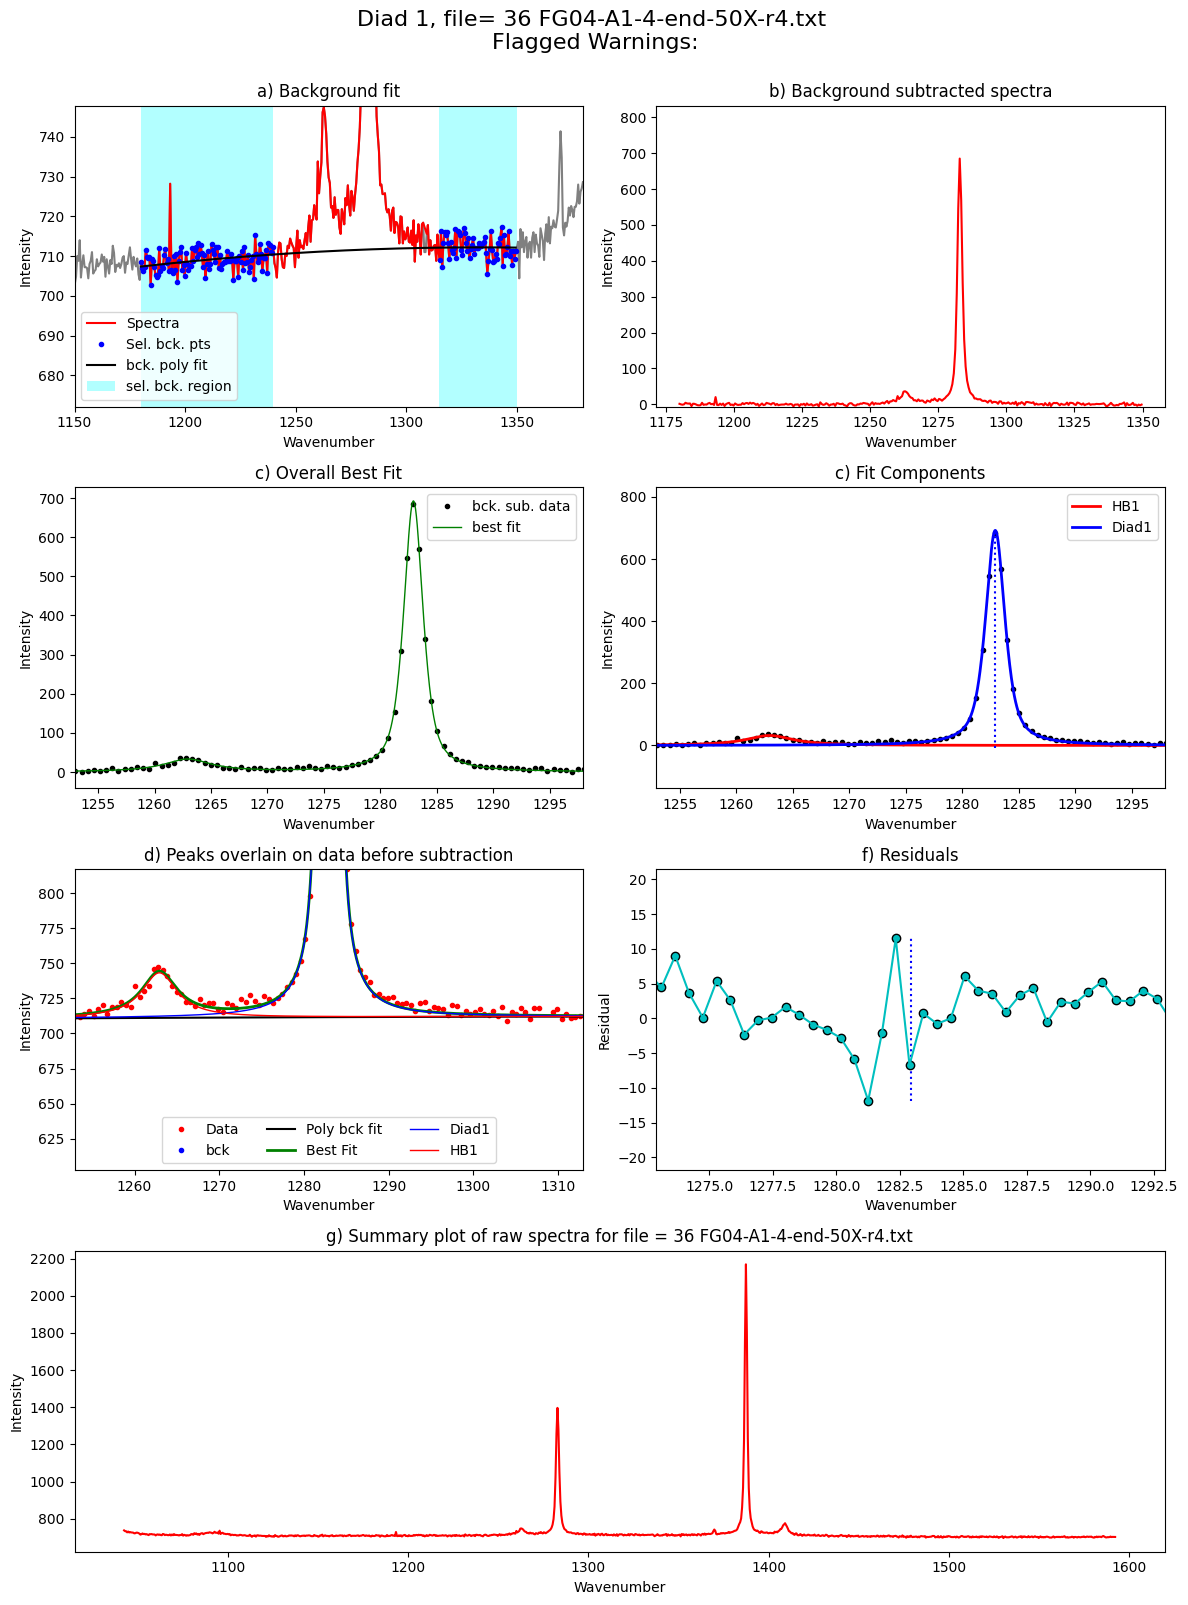

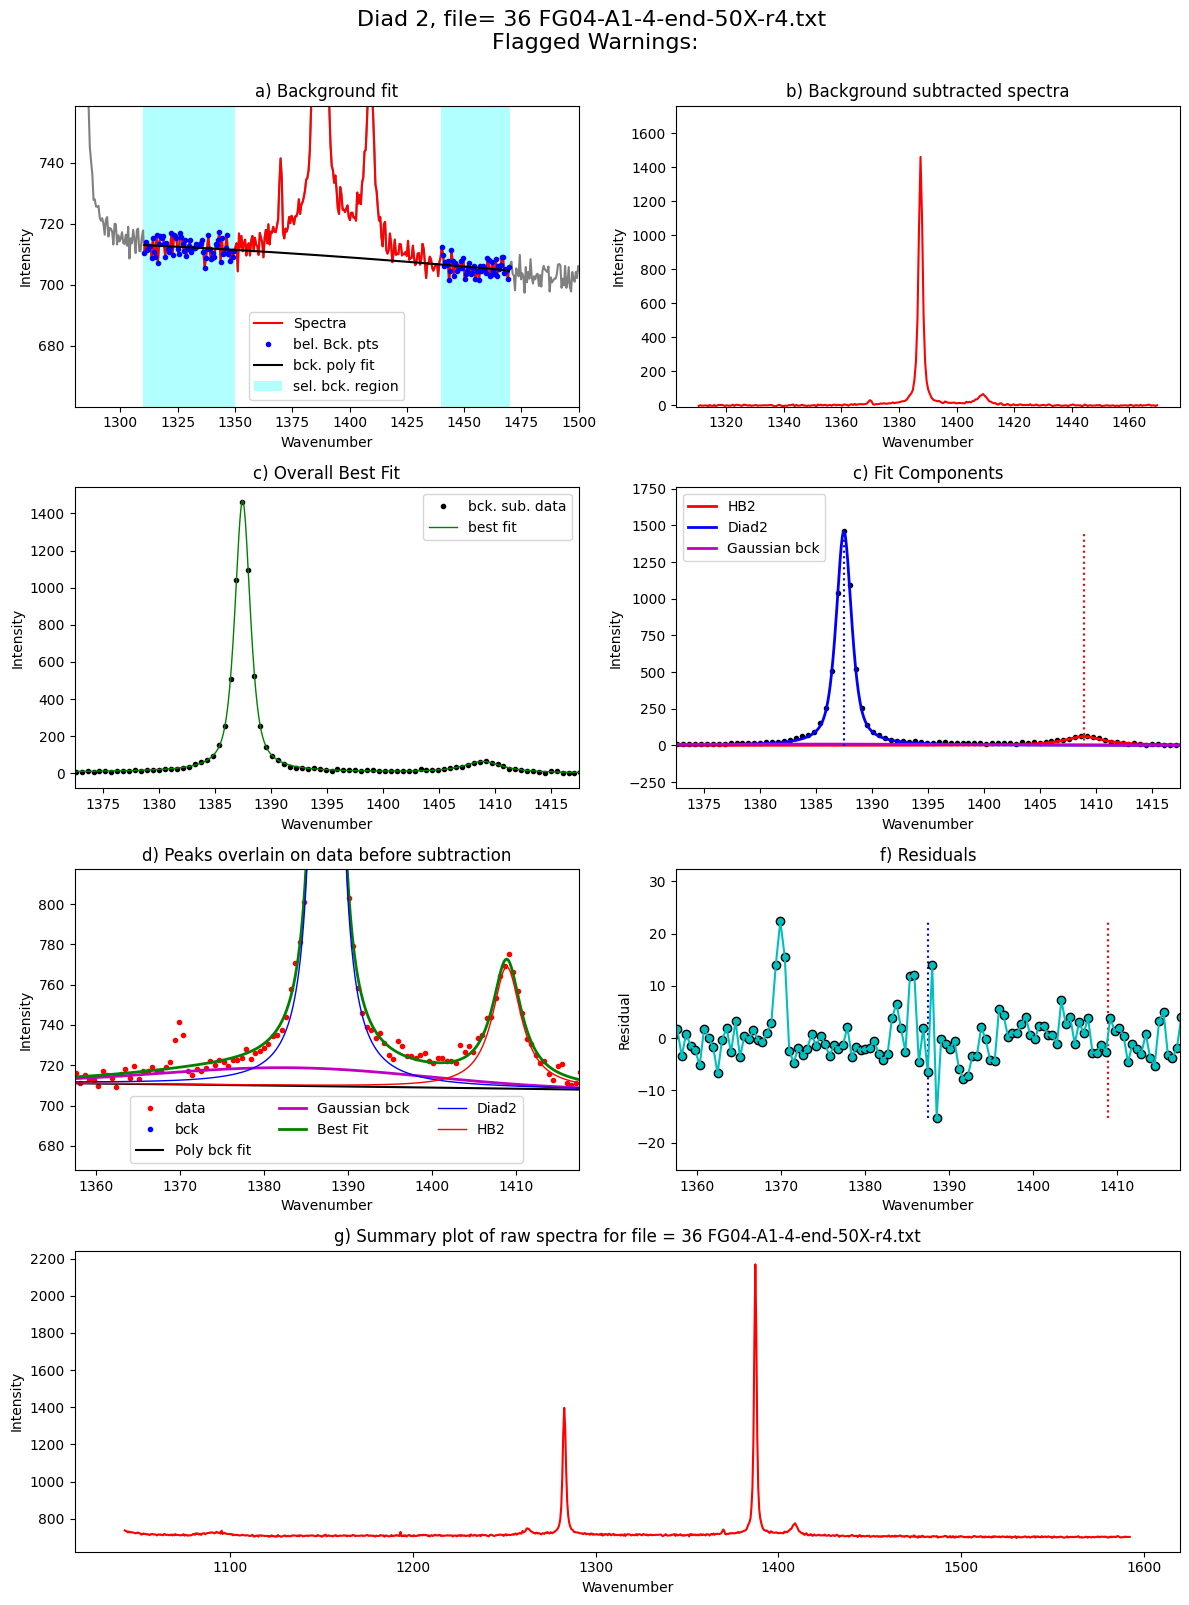

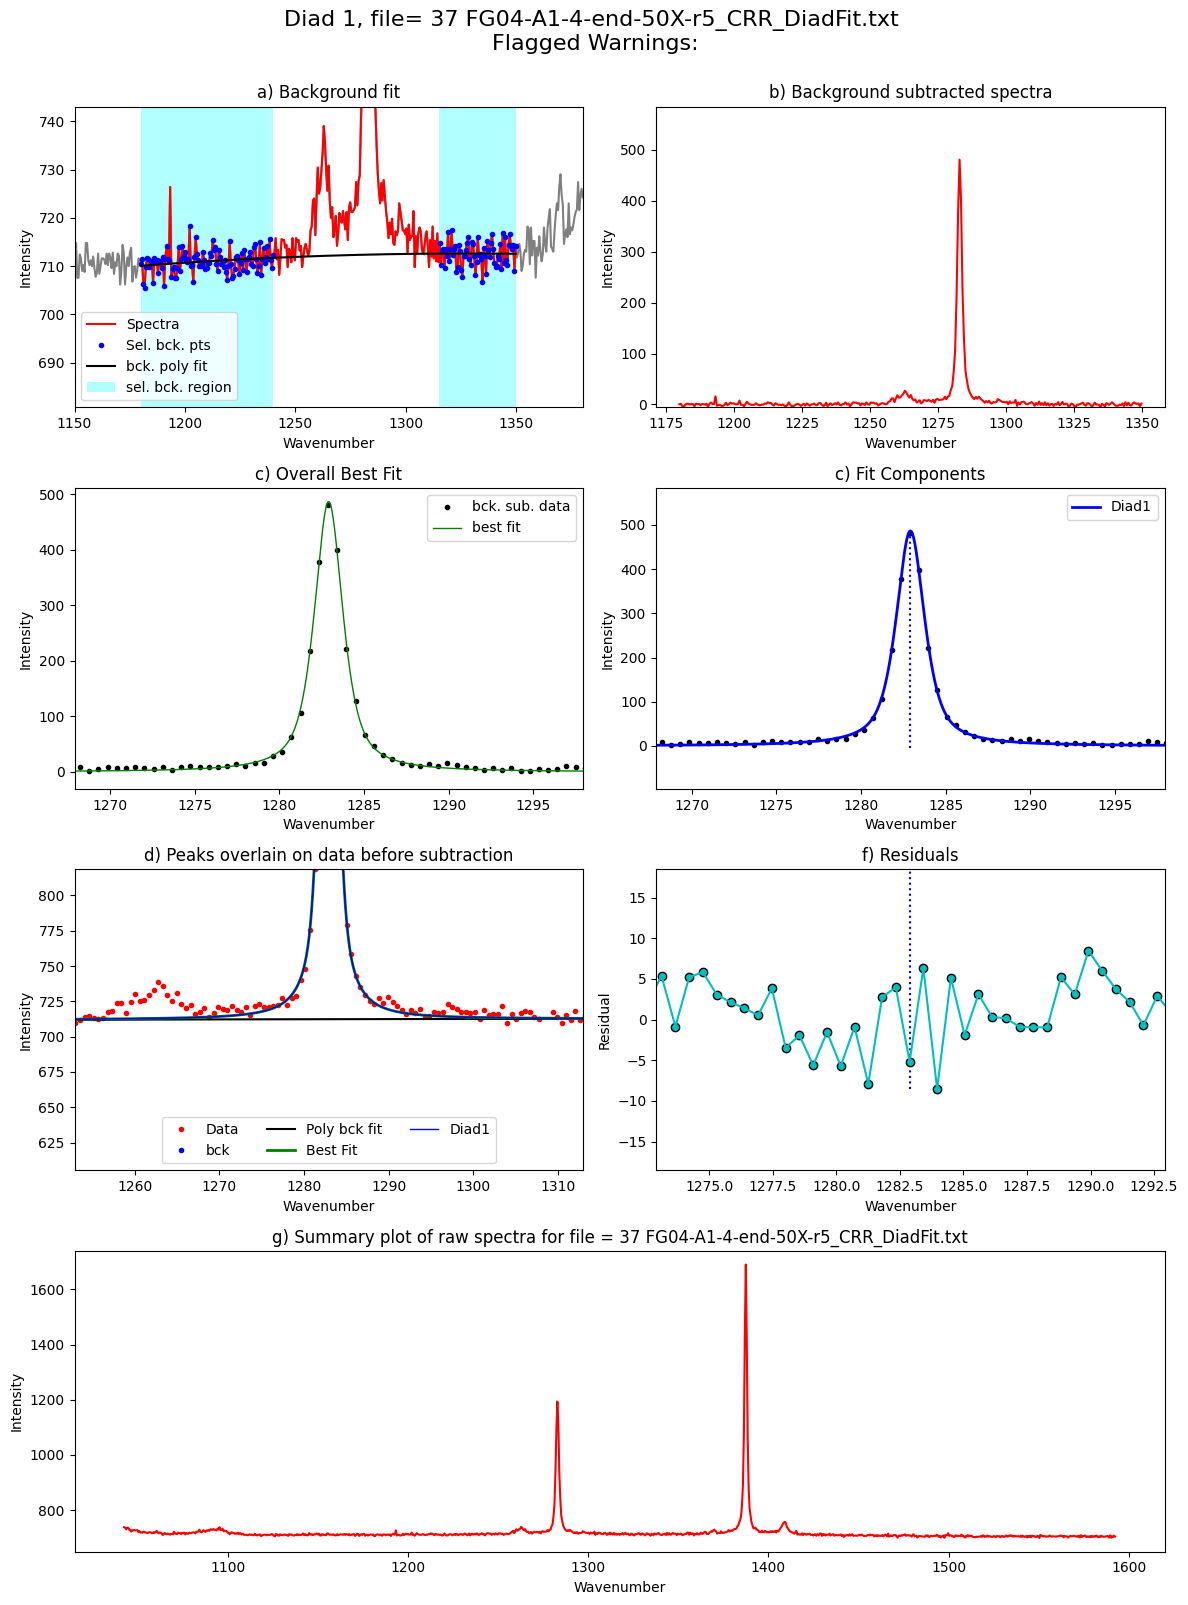

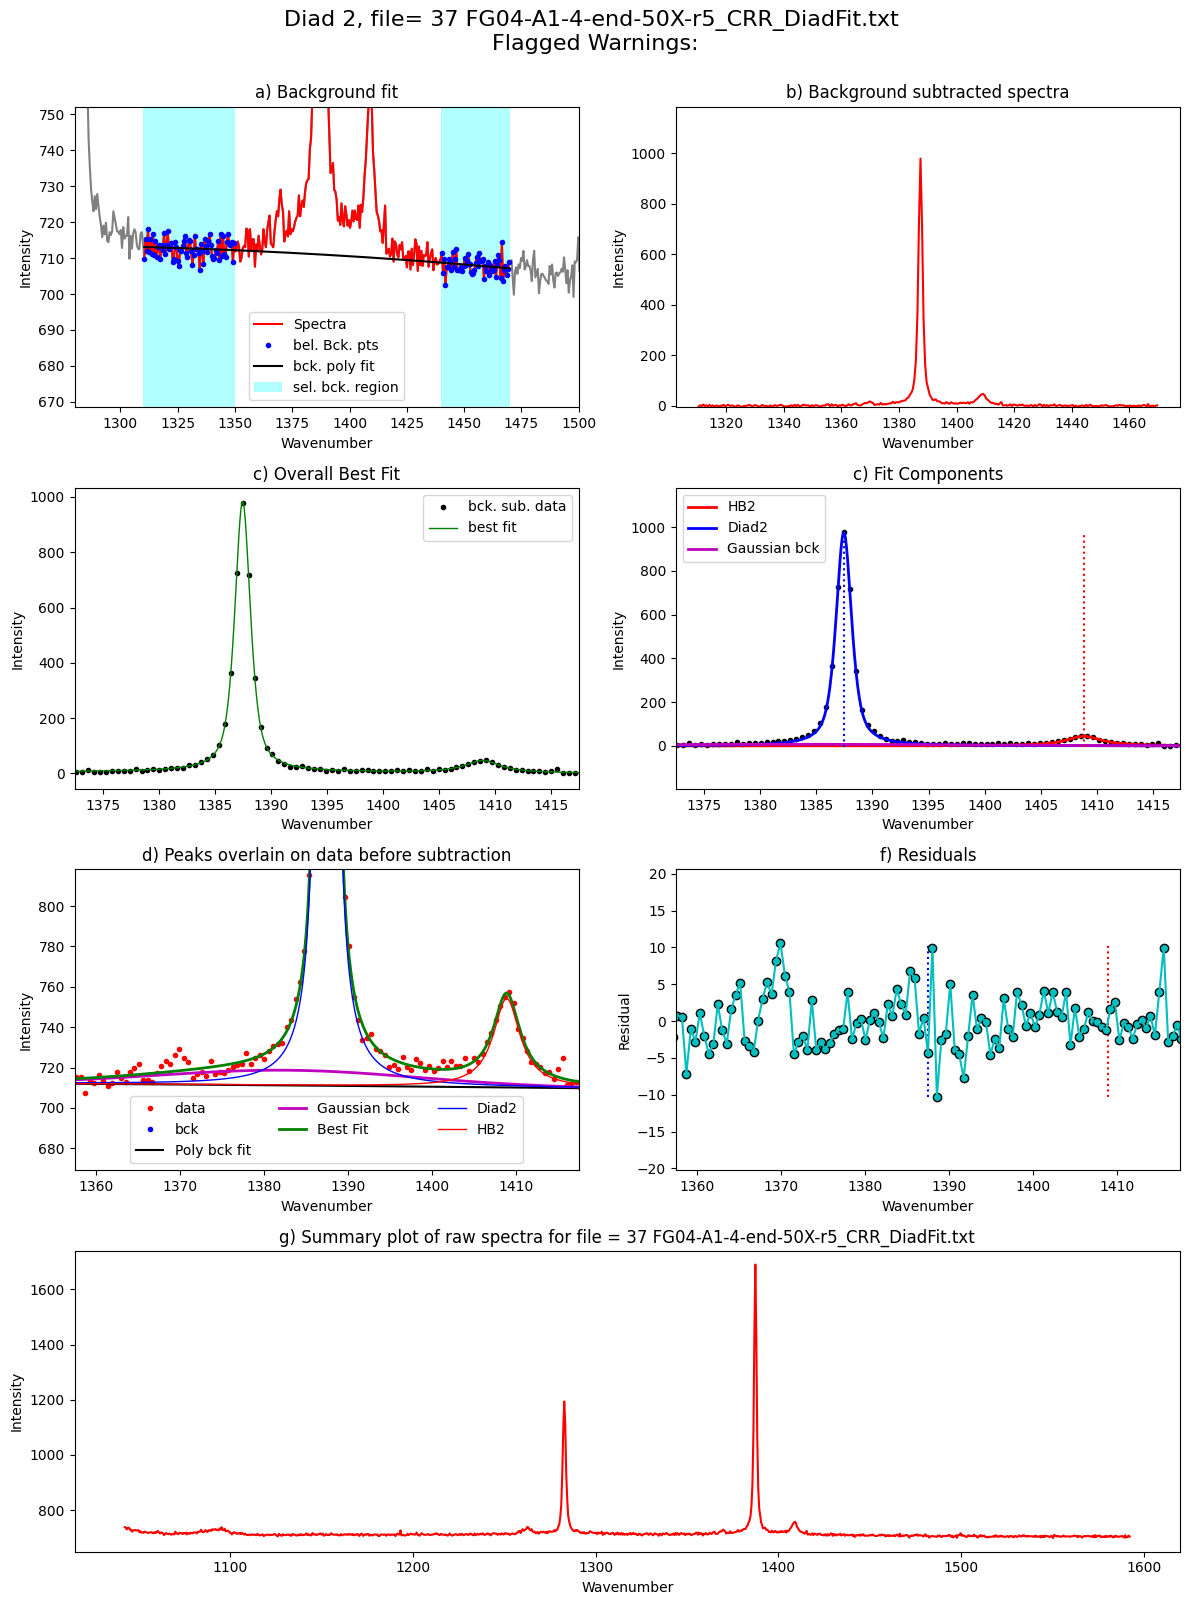

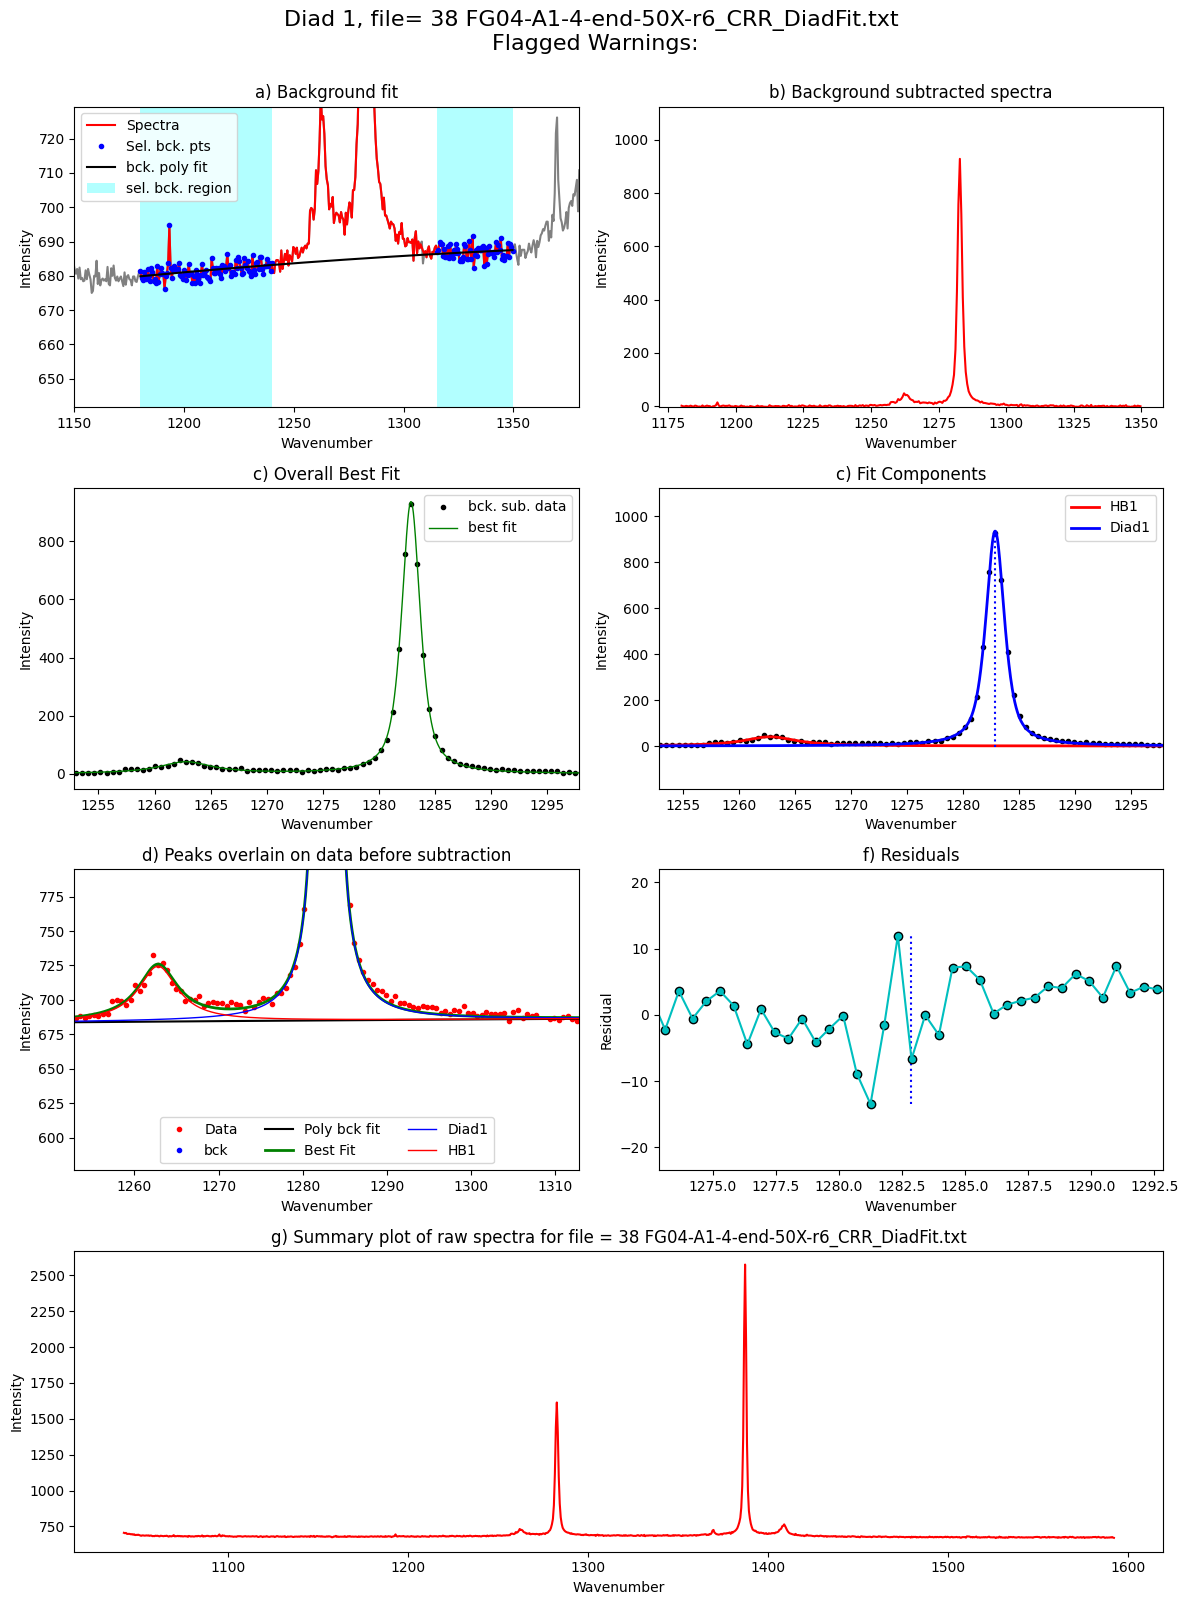

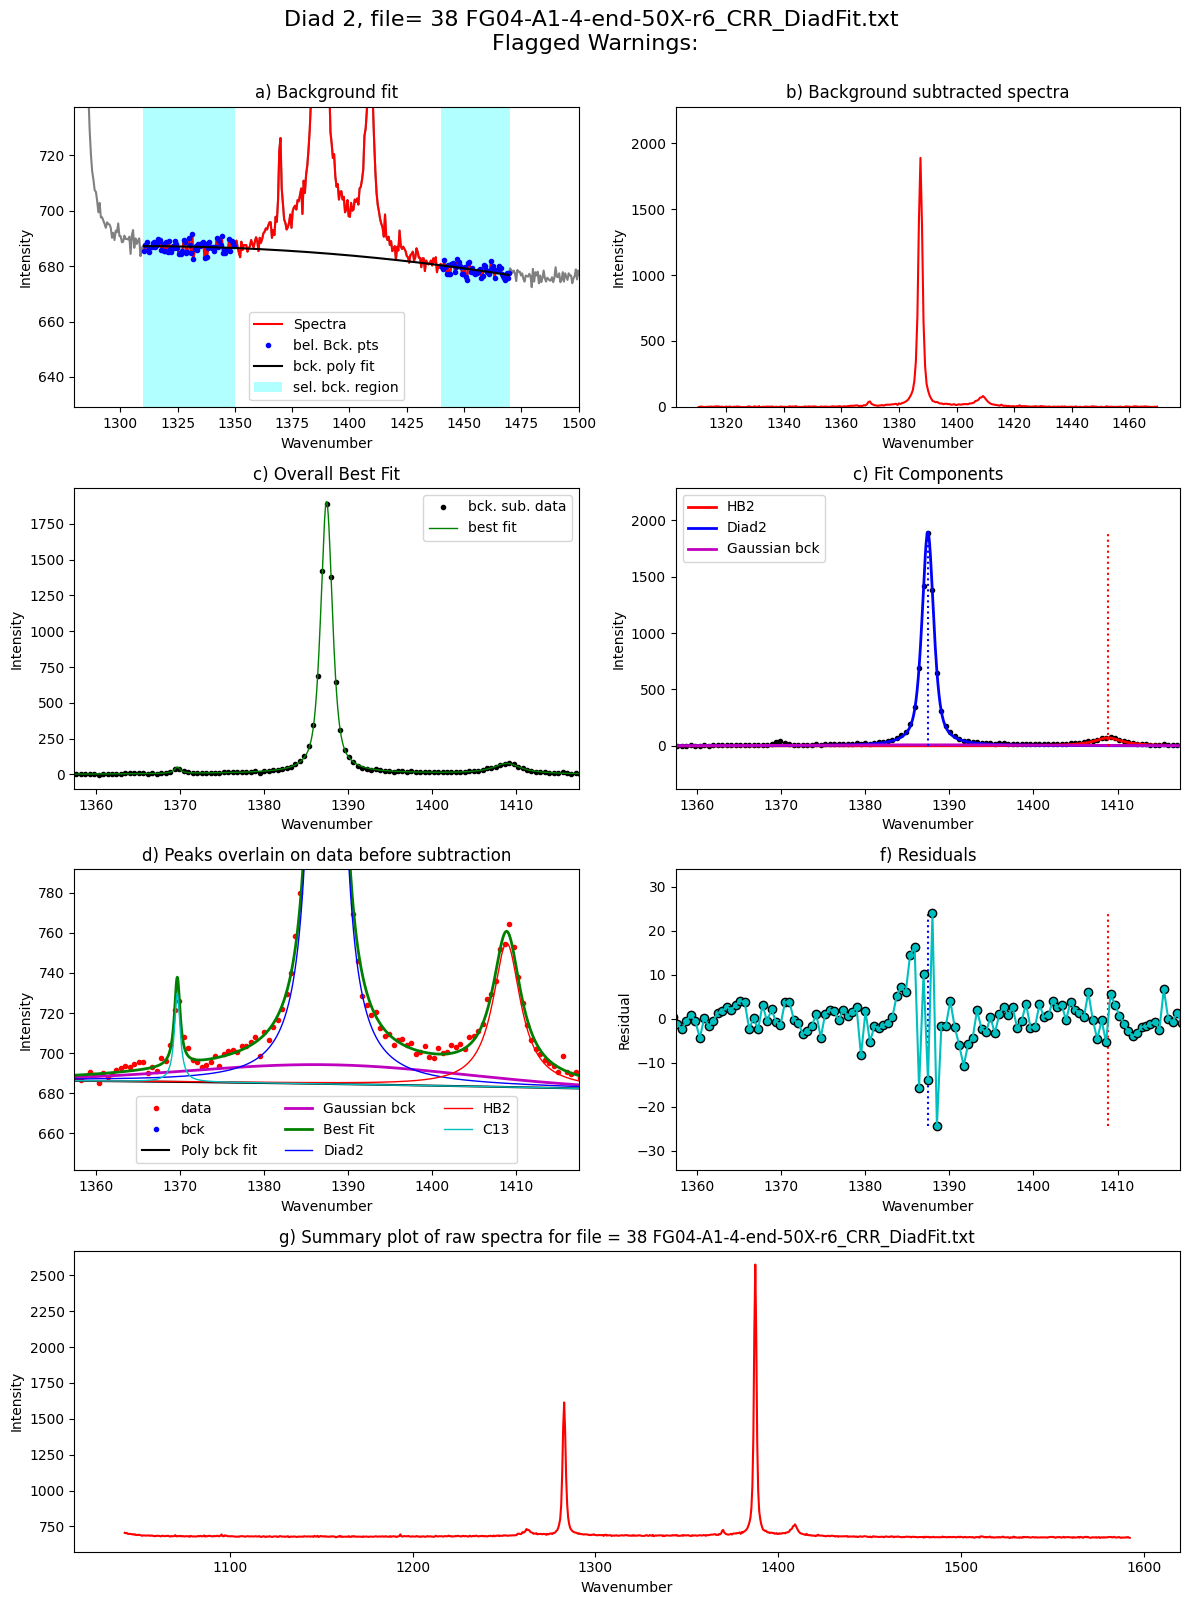

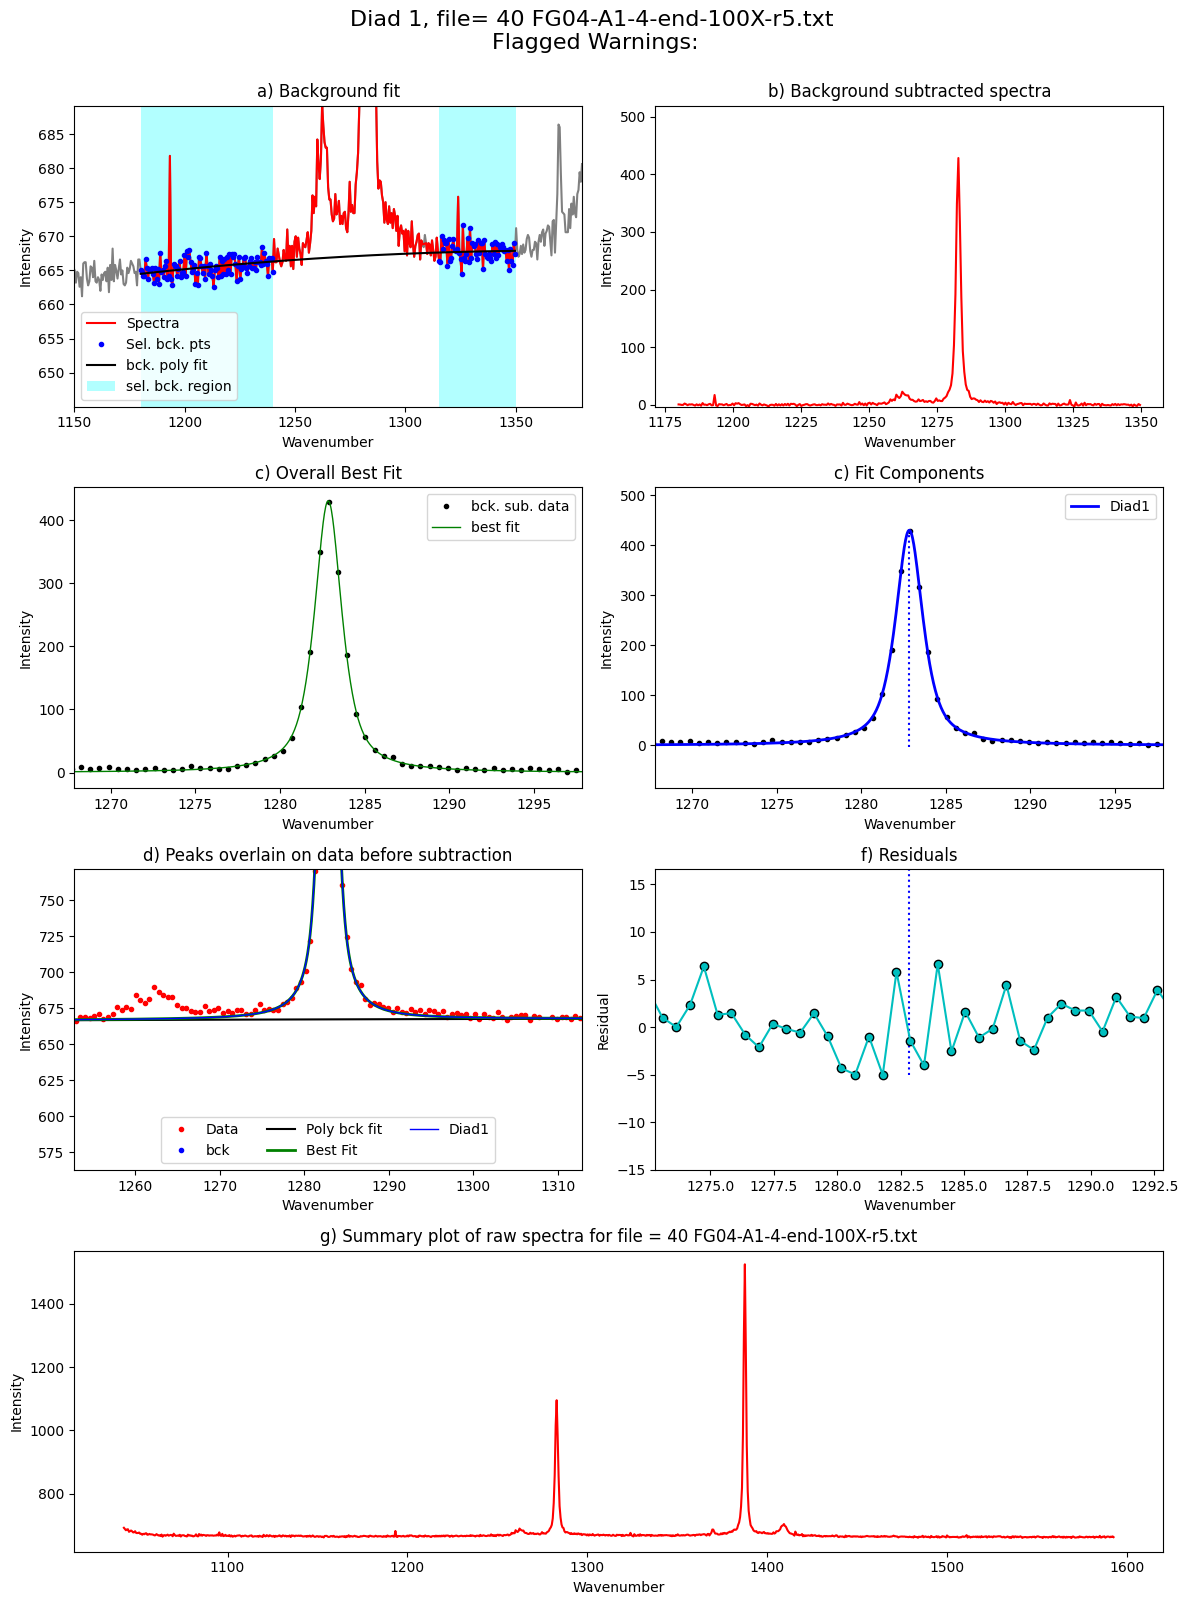

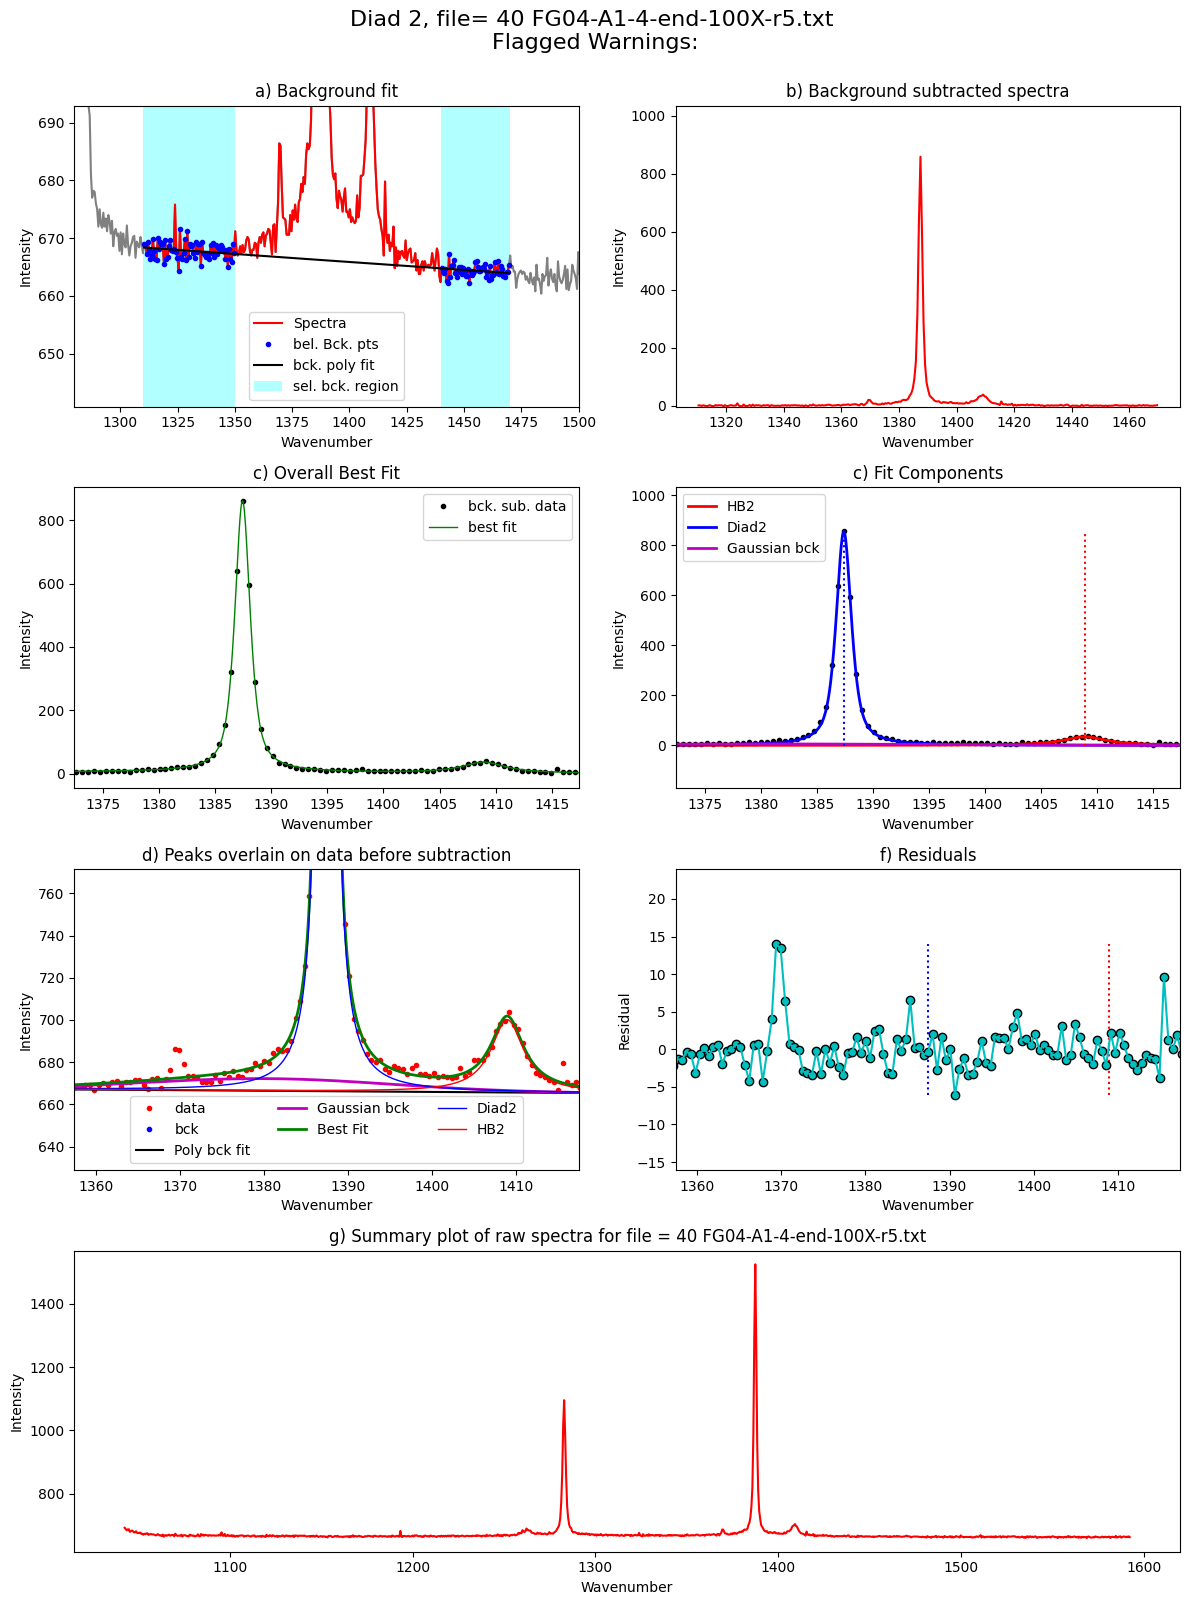

In [45]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [46]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [47]:
combo

filename   Splitting   Split_σ  \
0               FG04-A1-4-start-50X-r1  104.559000  0.002791   
1               FG04-A1-4-start-50X-r2  104.570912  0.002999   
2               FG04-A1-4-start-50X-r3  104.552584  0.002689   
3              FG04-A1-4-start-100X-r1  104.545520  0.006426   
4              FG04-A1-4-start-100X-r2  104.567413  0.006545   
5  FG04-A1-4-start-100X-r3_CRR_DiadFit  104.579968  0.006933   
6                 FG04-A1-4-end-50X-r4  104.550161  0.004176   
7     FG04-A1-4-end-50X-r5_CRR_DiadFit  104.531118  0.007993   
8     FG04-A1-4-end-50X-r6_CRR_DiadFit  104.575166  0.002823   
9                FG04-A1-4-end-100X-r5  104.577728  0.007248   

   Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0          1282.923322        0.002540             972.939288   
1          1282.912847        0.002792            1004.324664   
2          1282.904391        0.002016            1543.874411   
3          1282.929342        0.006259             671.597066   
4          1282.905213        0.006334             643.463389   
5          1282.895752        0.006720             651.505563   
6          1282.920269        0.003769             692.585530   
7          1282.911221        0.007694             486.452817   
8          1282.860228        0.002460             936.097686   
9          1282.842588        0.007019             430.234828   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  ...  \
0       1282.923372       2741.974491           1.006823        3.003673  ...   
1       1282.912897       2846.681143           1.003091        3.441579  ...   
2       1282.904441       4299.442068           0.983994        4.120977  ...   
3       1282.929342       1898.090082           0.994915        4.724461  ...   
4       1282.905213       1837.367280           1.001927        4.443581  ...   
5       1282.895752       1835.640611           0.977823        4.899903  ...   
6       1282.920319       1992.068111           1.025934        2.723721  ...   
7       1282.911221       1388.486872           1.004602        4.391445  ...   
8       1282.860278       2629.329576           0.991120        2.765024  ...   
9       1282.842588       1204.285907           0.967322        3.280148  ...   

   Diad1_Asym50  Diad1_Asym70 Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  \
0      1.011765      1.000000                  0.023690              0.002070   
1      1.041308      1.017857                  0.082872              0.001998   
2      1.006897      1.018182                  0.013572              0.001275   
3      1.000000      1.015682                  0.000000              0.002963   
4      1.030664      1.041013                  0.061447              0.003114   
5      1.093023      1.100381                  0.181921              0.003002   
6      1.029851      1.051374                  0.061250              0.002963   
7      1.064125      1.015366                  0.128840              0.004130   
8      1.005111      1.036496                  0.010131              0.002118   
9      1.068223      1.043263                  0.131987              0.004497   

   Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0      1.002004      1.015827                   0.003344   
1      1.014374      1.002907                   0.023524   
2      1.032258      1.045994                   0.054081   
3      1.014199      1.005747                   0.023549   
4      1.006000      1.024566                   0.010055   
5      1.002049      1.011765                   0.003337   
6      1.002037      1.017493                   0.003346   
7      1.026369      1.037736                   0.043909   
8      1.018330      1.027900                   0.030313   
9      1.039916      1.027859                   0.064858   

   Diad2_Remigi2021_BSF   Diad1_PDF_Model   Diad2_PDF_Model  
0              0.000842  PseudoVoigtModel  PseudoVoigtModel  
1              0.000797  PseudoVoigtMode

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [48]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step3 Fit All")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3 Fitall is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()